In [2]:
import prodimopy.read as pread
import prodimopy.plot as pplot
import prodimopy.plot_models as ppms
from matplotlib.backends.backend_pdf import PdfPages
import pickle
from tqdm import tqdm
import math
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import simpson
from scipy.constants import h as planck_h
from scipy.constants import k as boltzmann_k
from scipy.constants import c as speed_of_light
from scipy.constants import astronomical_unit as au
from scipy.constants import parsec as pc
import warnings
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
warnings.simplefilter("ignore", DeprecationWarning)

In [3]:
def total_flux(wl, flux_nu):
    """
    Calculate the total flux over the wavelengths and returns the flux in erg cm^-2 s^-1
    """
    flux_lambda = (speed_of_light * 100 / ((wl * 1e-4) ** 2)) * flux_nu * 1e-23
    tot_flux = np.trapezoid(flux_lambda, (wl * 1e-4))
    return tot_flux


def add_noise(flux, SNR=300):
    """
    SNR = flux/sigma
    """
    noise_level = np.min(flux) / SNR
    noise = np.random.normal(0, noise_level, size=flux.shape)
    return flux + noise

In [5]:
import math
from scipy.ndimage import gaussian_filter1d


def mask_regions(wavelength, flux, regions):
    new_flux = flux.copy()
    for region in regions:
        new_flux[np.logical_and(wavelength > region[0], wavelength < region[1])] = np.nan
    return new_flux


artefact_regions = [[5.0091, 5.01071], [5.018, 5.019], [5.112, 5.15],
                    [5.2157, 5.2184], [5.2267, 5.2290], [5.2441, 5.2471],
                    [5.2947, 5.2974], [5.3742, 5.3777], [5.3836, 5.3877],
                    [5.4181, 5.4210], [5.5644, 5.5674], [5.5925, 5.5966],
                    [5.8252, 5.8267], [5.8669, 5.8689], [5.9, 5.916], [5.9282, 5.9314],
                    [5.9691, 5.9728], [6.0357, 6.0394], [6.0430, 6.0462],
                    [6.1012, 6.1044], [6.1311, 6.1421], [6.26, 6.31], [6.3740, 6.3757],
                    [6.3783, 6.3810], [18.8055, 18.8145], [19.004, 19.012],
                    [21.974, 21.985], [25.69824, 25.71313]]

In [4]:
plt.rcParams.update({
    'font.size': 16,           # Global font size
    'axes.titlesize': 20,      # Title font size
    'axes.labelsize': 18,      # Axis label font size
    'xtick.labelsize': 16,     # X tick labels
    'ytick.labelsize': 16,     # Y tick labels
    'legend.fontsize': 16,     # Legend text
})
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = 600

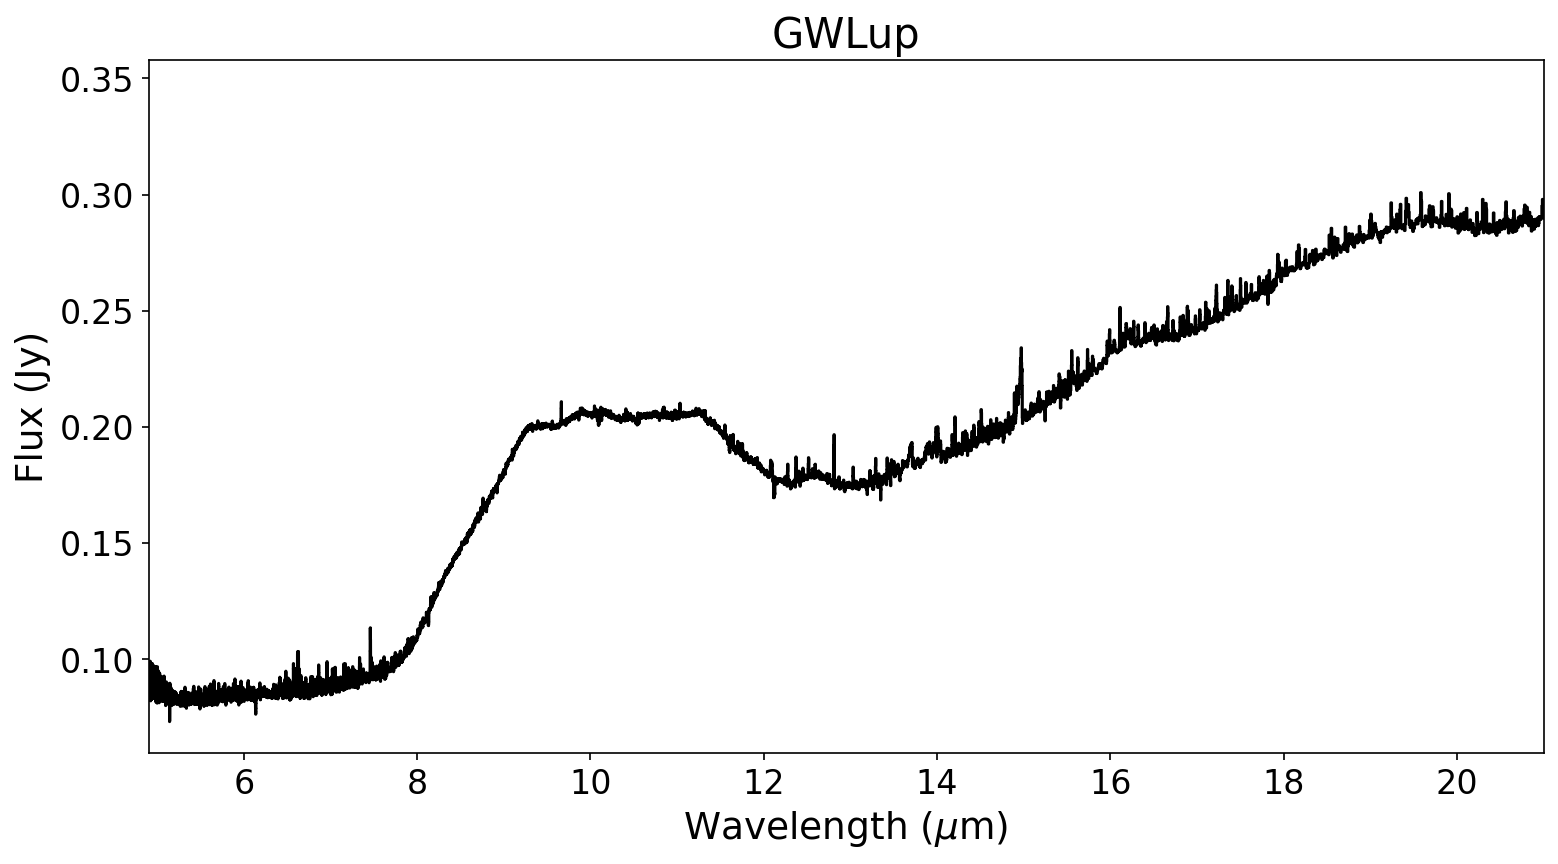

In [92]:
fig = plt.figure(figsize=(12, 6))  # width=8 inches, height=6 inches
ax = fig.add_subplot(111)
file = f'FullSpectrum_CS_GWLup.p'
data = pickle.load(open(file, 'rb'))
wavelength = data['Wavelength']
flux_cont_sub = data['CSFlux']
flux = data['Flux']
ax.step(wavelength, flux, c='black')
ax.set_title('GW Lup')
ax.set_xlim(4.9, 21)
ax.set_xlabel(r'Wavelength ($\mu$m)')
ax.set_ylabel('Flux (Jy)')
# plt.ylim(-4, 5)
plt.savefig(f'Figures/GWLup0.jpg', bbox_inches='tight')
plt.show()

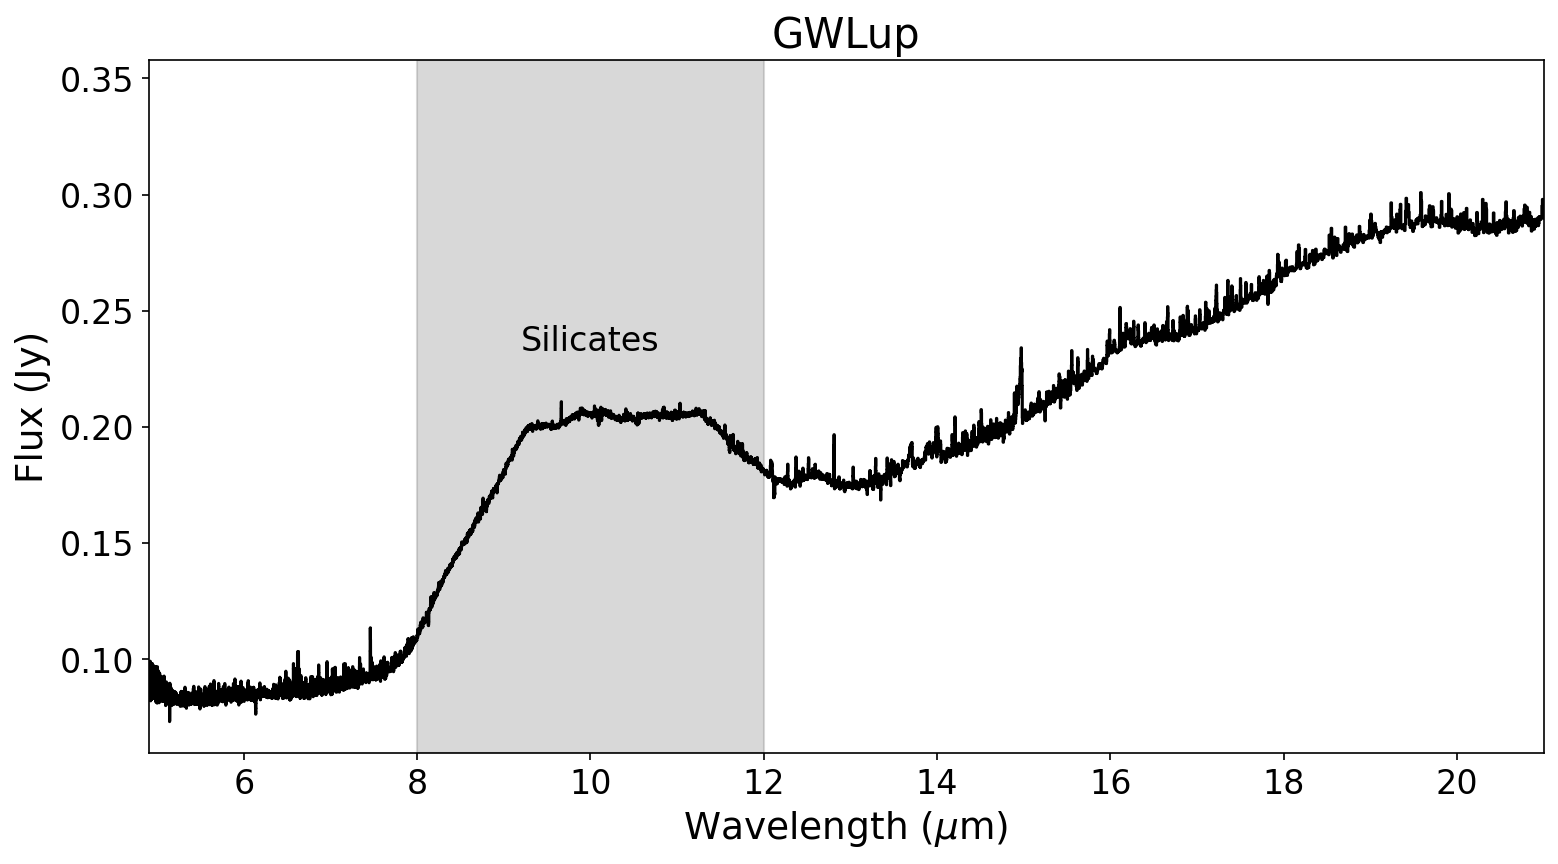

In [93]:
fig = plt.figure(figsize=(12, 6))  # width=8 inches, height=6 inches
ax = fig.add_subplot(111)
file = f'FullSpectrum_CS_GWLup.p'
data = pickle.load(open(file, 'rb'))
wavelength = data['Wavelength']
flux_cont_sub = data['CSFlux']
flux = data['Flux']
ax.step(wavelength, flux, c='black')
ax.axvspan(8, 12, color='gray', alpha=0.3)
ax.text(
    10, 0.23,                # (x, y) coordinates
    "Silicates",          # text string
    color='black',             # match the shaded area
    fontsize=16,
    ha='center',              # horizontal alignment
    va='bottom',              # vertical alignment
    rotation=0                # optional: tilt the text
)
ax.set_title('GW Lup')
ax.set_xlim(4.9, 21)
ax.set_xlabel(r'Wavelength ($\mu$m)')
ax.set_ylabel('Flux (Jy)')
# plt.ylim(-4, 5)
plt.savefig(f'Figures/GWLup1.jpg', bbox_inches='tight')
plt.show()



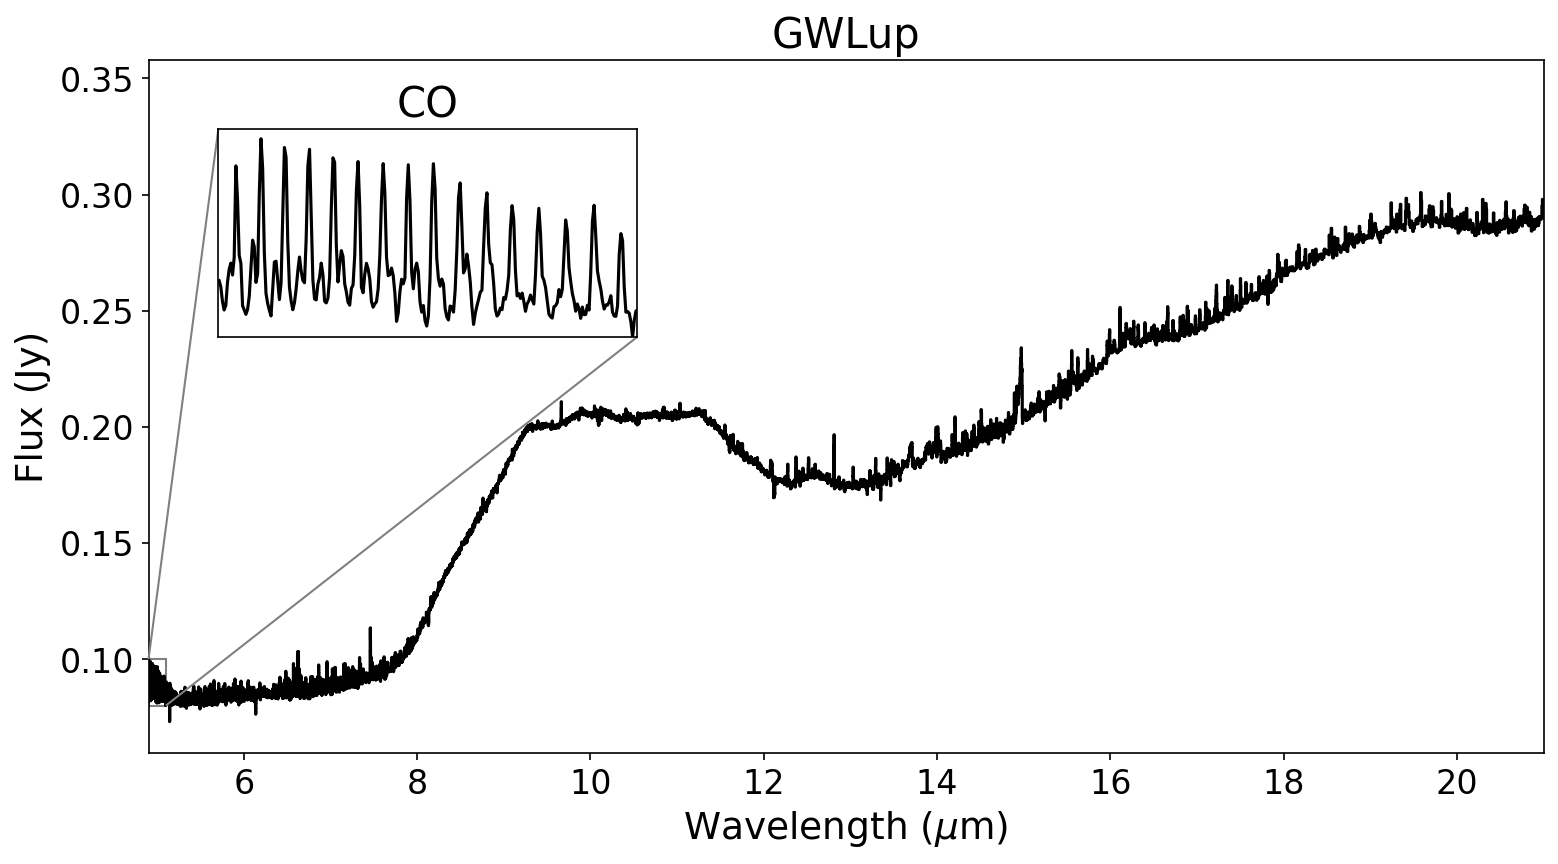

In [94]:
fig = plt.figure(figsize=(12, 6))  # width=8 inches, height=6 inches
ax = fig.add_subplot(111)
file = f'FullSpectrum_CS_GWLup.p'
data = pickle.load(open(file, 'rb'))
wavelength = data['Wavelength']
flux_cont_sub = data['CSFlux']
flux = data['Flux']
ax.step(wavelength, flux, c='black')

axins = inset_axes(ax, width="30%", height="30%", bbox_to_anchor=(-0.65, -0.1, 1, 1),  # (x, y) in axes fraction or figure fraction
    bbox_transform=ax.transAxes,
    borderpad=0,
)
axins.plot(wavelength, flux, c='black')
axins.set_xlim(4.9, 5.1)
axins.set_ylim(0.08, .1)
axins.set_xticklabels([])
axins.set_yticklabels([])
axins.set_xticks([])
axins.set_yticks([])
axins.set_title('CO')
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")


ax.set_title('GW Lup')
ax.set_xlim(4.9, 21)
ax.set_xlabel(r'Wavelength ($\mu$m)')
ax.set_ylabel('Flux (Jy)')
# plt.ylim(-4, 5)
plt.savefig(f'Figures/GWLup2.jpg', bbox_inches='tight')
plt.show()

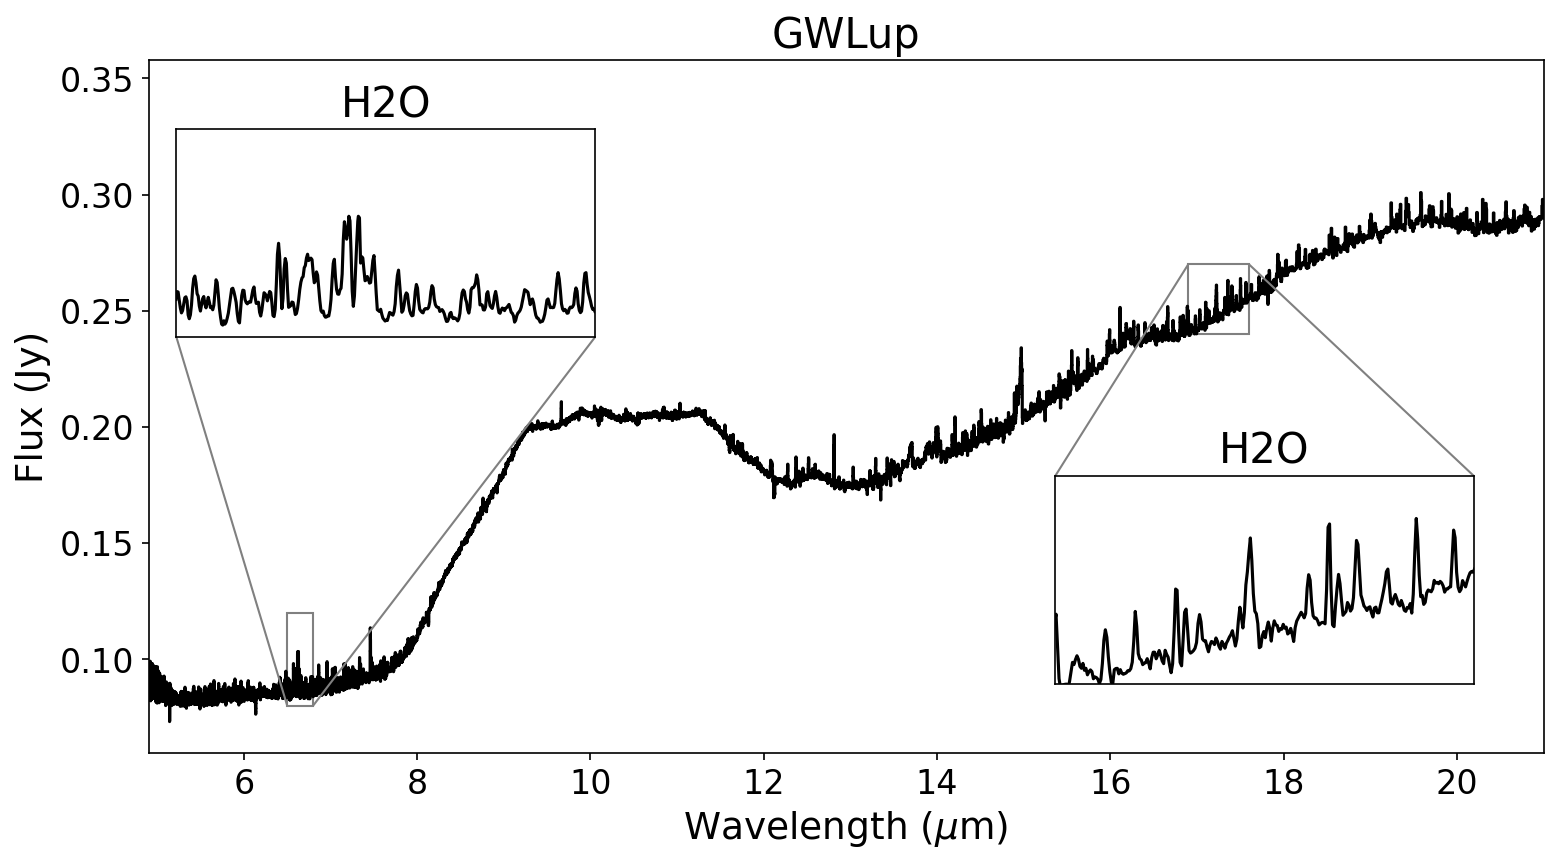

In [95]:
fig = plt.figure(figsize=(12, 6))  # width=8 inches, height=6 inches
ax = fig.add_subplot(111)
file = f'FullSpectrum_CS_GWLup.p'
data = pickle.load(open(file, 'rb'))
wavelength = data['Wavelength']
flux_cont_sub = data['CSFlux']
flux = data['Flux']
ax.step(wavelength, flux, c='black')

axins1 = inset_axes(ax, width="30%", height="30%", bbox_to_anchor=(-0.68, -0.1, 1, 1),  # (x, y) in axes fraction or figure fraction
    bbox_transform=ax.transAxes,
    borderpad=0,
)
axins1.plot(wavelength, flux, c='black')
axins1.set_xlim(6.5, 6.8)
axins1.set_ylim(0.08, .12)
axins1.set_xticklabels([])
axins1.set_yticklabels([])
axins1.set_xticks([])
axins1.set_yticks([])
axins1.set_title('H2O')
mark_inset(ax, axins1, loc1=4, loc2=3, fc="none", ec="0.5")

axins2 = inset_axes(ax, width="30%", height="30%", bbox_to_anchor=(-0.05, -0.6, 1, 1),  # (x, y) in axes fraction or figure fraction
    bbox_transform=ax.transAxes,
    borderpad=0,
)
axins2.plot(wavelength, flux, c='black')
axins2.set_xlim(16.9, 17.6)
axins2.set_ylim(0.24, .27)
axins2.set_xticklabels([])
axins2.set_yticklabels([])
axins2.set_xticks([])
axins2.set_yticks([])
axins2.set_title('H2O')
mark_inset(ax, axins2, loc1=1, loc2=2, fc="none", ec="0.5")

ax.set_title('GW Lup')
ax.set_xlim(4.9, 21)
ax.set_xlabel(r'Wavelength ($\mu$m)')
ax.set_ylabel('Flux (Jy)')
# plt.ylim(-4, 5)
plt.savefig(f'Figures/GWLup3.jpg', bbox_inches='tight')
plt.show()

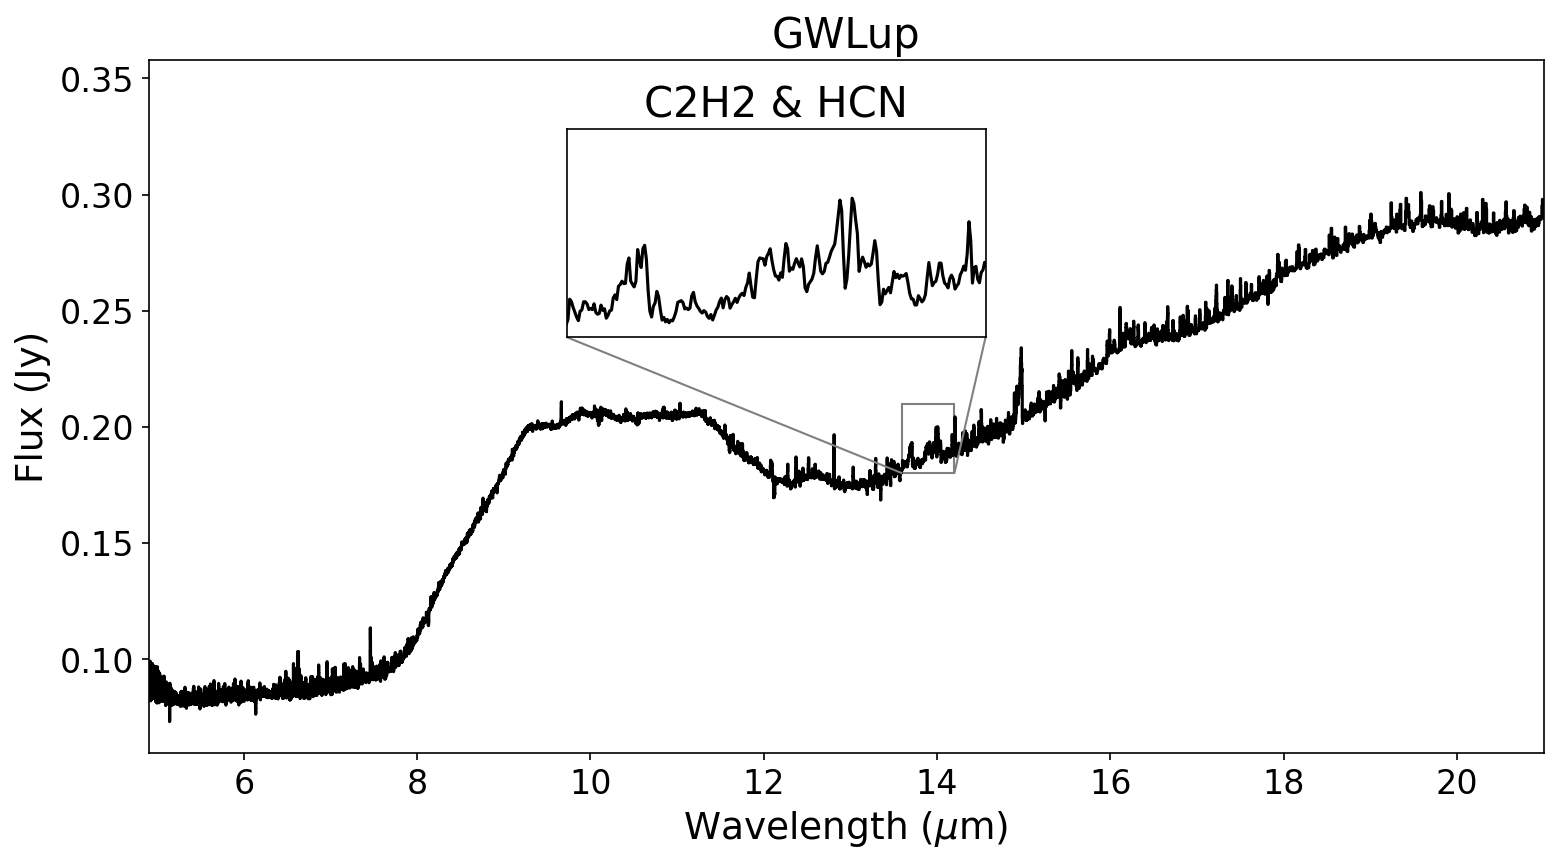

In [96]:
fig = plt.figure(figsize=(12, 6))  # width=8 inches, height=6 inches
ax = fig.add_subplot(111)
file = f'FullSpectrum_CS_GWLup.p'
data = pickle.load(open(file, 'rb'))
wavelength = data['Wavelength']
flux_cont_sub = data['CSFlux']
flux = data['Flux']
ax.step(wavelength, flux, c='black')

axins = inset_axes(ax, width="30%", height="30%", bbox_to_anchor=(-0.4, -0.1, 1, 1),  # (x, y) in axes fraction or figure fraction
    bbox_transform=ax.transAxes,
    borderpad=0,
)
axins.plot(wavelength, flux, c='black')
axins.set_xlim(13.6, 14.2)
axins.set_ylim(0.18, .21)
axins.set_xticklabels([])
axins.set_yticklabels([])
axins.set_xticks([])
axins.set_yticks([])
axins.set_title('C2H2 & HCN')
mark_inset(ax, axins, loc1=4, loc2=3, fc="none", ec="0.5")


ax.set_title('GW Lup')
ax.set_xlim(4.9, 21)
ax.set_xlabel(r'Wavelength ($\mu$m)')
ax.set_ylabel('Flux (Jy)')
# plt.ylim(-4, 5)
plt.savefig(f'Figures/GWLup4.jpg', bbox_inches='tight')
plt.show()

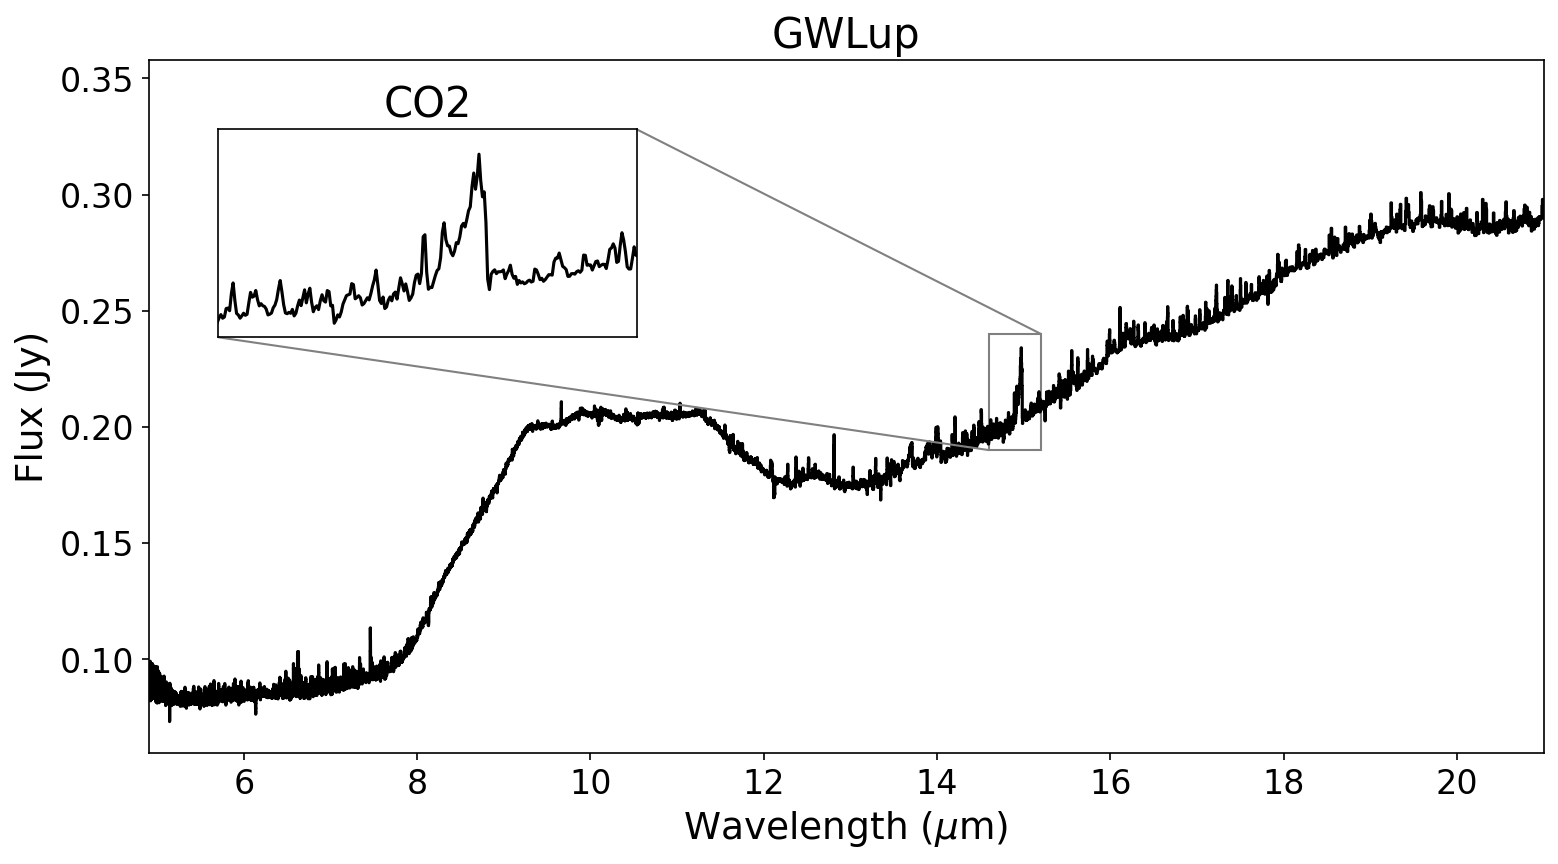

In [97]:
fig = plt.figure(figsize=(12, 6))  # width=8 inches, height=6 inches
ax = fig.add_subplot(111)
file = f'FullSpectrum_CS_GWLup.p'
data = pickle.load(open(file, 'rb'))
wavelength = data['Wavelength']
flux_cont_sub = data['CSFlux']
flux = data['Flux']
ax.step(wavelength, flux, c='black')

axins = inset_axes(ax, width="30%", height="30%", bbox_to_anchor=(-0.65, -0.1, 1, 1),  # (x, y) in axes fraction or figure fraction
    bbox_transform=ax.transAxes,
    borderpad=0,
)
axins.plot(wavelength, flux, c='black')
axins.set_xlim(14.6, 15.2)
axins.set_ylim(0.19, .24)
axins.set_xticklabels([])
axins.set_yticklabels([])
axins.set_xticks([])
axins.set_yticks([])
axins.set_title('CO2')
mark_inset(ax, axins, loc1=1, loc2=3, fc="none", ec="0.5")


ax.set_title('GW Lup')
ax.set_xlim(4.9, 21)
ax.set_xlabel(r'Wavelength ($\mu$m)')
ax.set_ylabel('Flux (Jy)')
# plt.ylim(-4, 5)
plt.savefig(f'Figures/GWLup5.jpg', bbox_inches='tight')
plt.show()

In [6]:
with open('ProDiMoData1000_N.pkl', 'rb') as f:
    models = pickle.load(f)

PLOT: plot_cont ...
PLOT: plot_cont ...


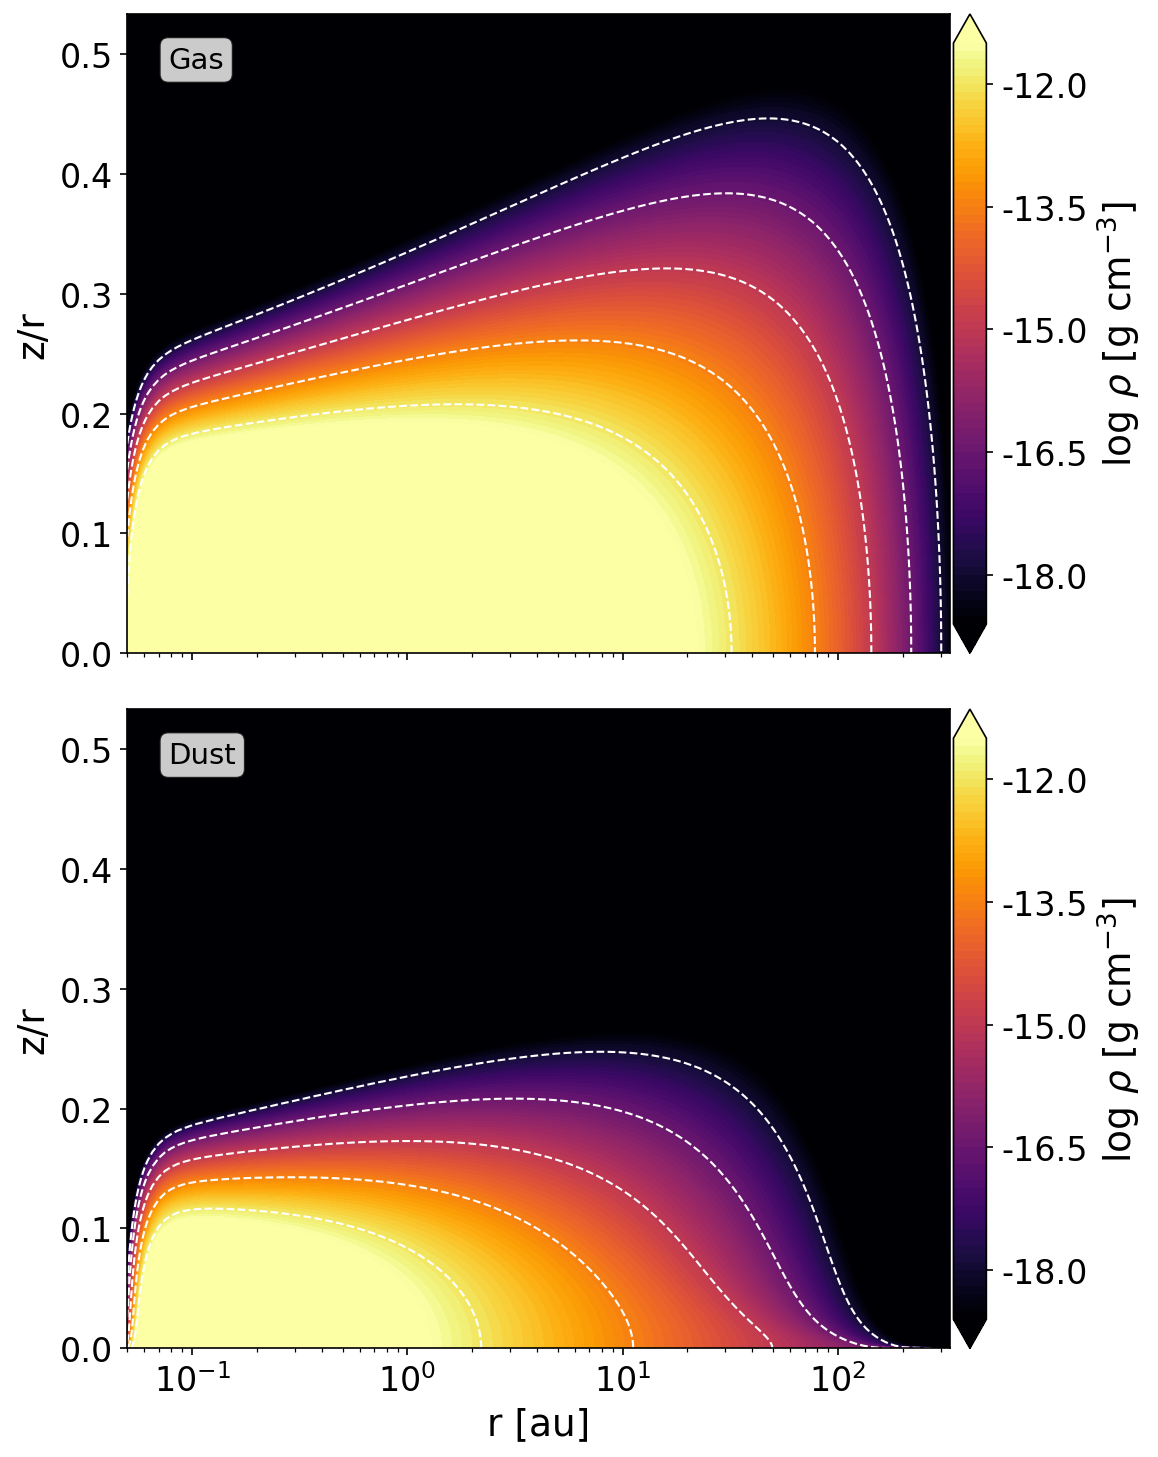

In [21]:
for i, model in enumerate(models):
    if i != 12:
        continue

    fig, axs = plt.subplots(2, 1, figsize=(8, 10))  # 2x1 layout
    pp = pplot.Plot(None)
    constyle = {"cmap": "inferno", "extend": "both", "cb_format": "%.1f", "zlim": [3.e-19, 3.e-12]}

    fig = pp.plot_cont(model, model.rhog, label=r"log $\rho$ [g cm$^{-3}$]", ax=axs[0], **constyle)
    fig = pp.plot_cont(model, model.rhod, label=r"log $\rho$ [g cm$^{-3}$]", ax=axs[1], **constyle)

    props = dict(boxstyle='round', facecolor='white', alpha=0.8)
    axs[0].text(0.05, 0.95, "Gas", transform=axs[0].transAxes, fontsize=14,
                verticalalignment='top', bbox=props)
    axs[1].text(0.05, 0.95, "Dust", transform=axs[1].transAxes, fontsize=14,
                verticalalignment='top', bbox=props)

    axs[0].set_xlabel("")
    axs[0].set_xticklabels([])

    plt.tight_layout()
    plt.savefig('Figures/Density.jpg', bbox_inches='tight')
    plt.show()

PLOT: plot_cont ...
PLOT: plot_cont ...


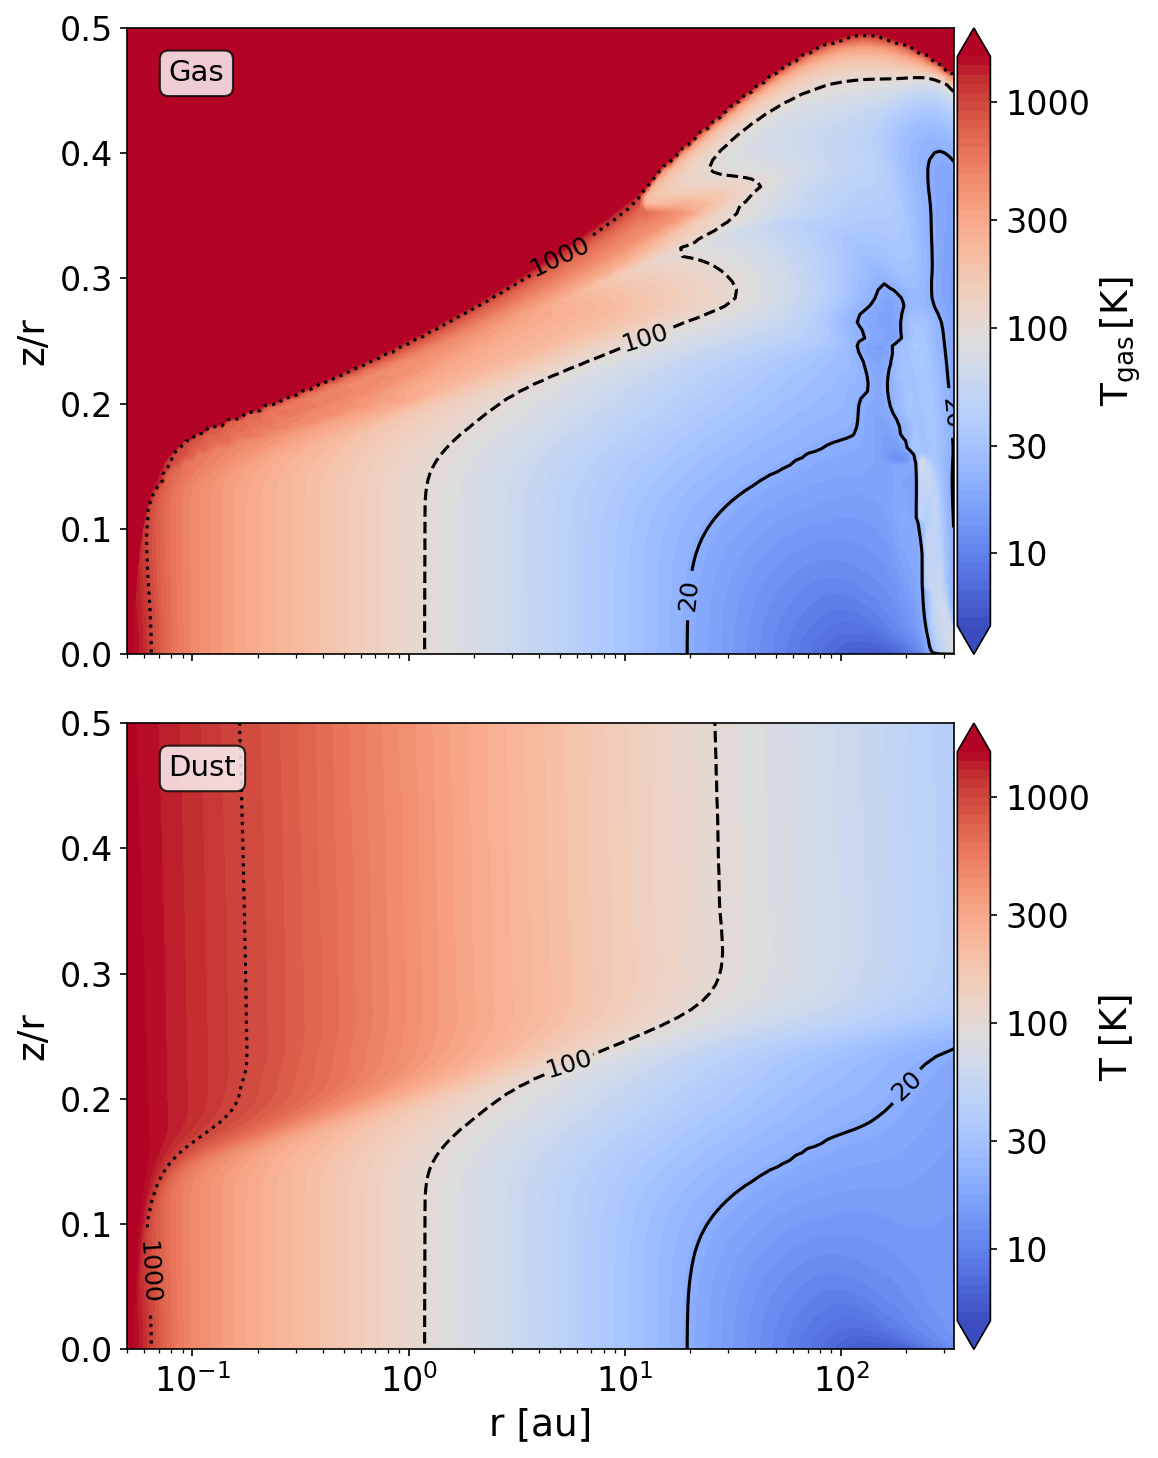

In [23]:
for i, model in enumerate(models):
    if i != 12:
        continue

    fig, axs = plt.subplots(2, 1, figsize=(8, 10))  # 2x1 layout
    pp = pplot.Plot(None)
    cbticks = [10, 30, 100, 300, 1000]

    tcont_gas = pplot.Contour(model.tg, [20, 100, 1000], linestyles=["-", "--", ":"],
                              showlabels=True, label_fontsize=12, label_fmt="%.0f", colors='black')
    _ = pp.plot_cont(model, model.tg, r"$\mathrm{T_{gas}\,[K]}$", zr=True, xlog=True,
                     ylim=[0, 0.5], zlim=[5, 1500], extend="both",
                     oconts=[tcont_gas], contour=False,
                     clevels=cbticks, clabels=map(str, cbticks),
                     cb_format="%.0f", ax=axs[0], fig=fig, cmap='coolwarm', showcb=True)

    tcont_dust = pplot.Contour(model.td, [20, 100, 1000], linestyles=["-", "--", ":"],
                               showlabels=True, label_fontsize=12, label_fmt="%.0f", colors='black')
    _ = pp.plot_cont(model, model.td, r"T [K]", zr=True, xlog=True,
                     ylim=[0, 0.5], zlim=[5, 1500], extend="both",
                     oconts=[tcont_dust], contour=False,
                     clevels=cbticks, clabels=map(str, cbticks),
                     cb_format="%.0f", ax=axs[1], fig=fig, cmap='coolwarm')

    props = dict(boxstyle='round', facecolor='white', alpha=0.8)
    axs[0].text(0.05, 0.95, "Gas", transform=axs[0].transAxes, fontsize=14,
                verticalalignment='top', bbox=props)
    axs[1].text(0.05, 0.95, "Dust", transform=axs[1].transAxes, fontsize=14,
                verticalalignment='top', bbox=props)

    axs[0].set_xlabel("")
    axs[0].set_xticklabels([])

    plt.tight_layout()
    plt.savefig('Figures/Temperature.jpg', bbox_inches='tight')
    plt.show()


PLOT: plot_abuncont_grid ...
[1e-15, 0.001]


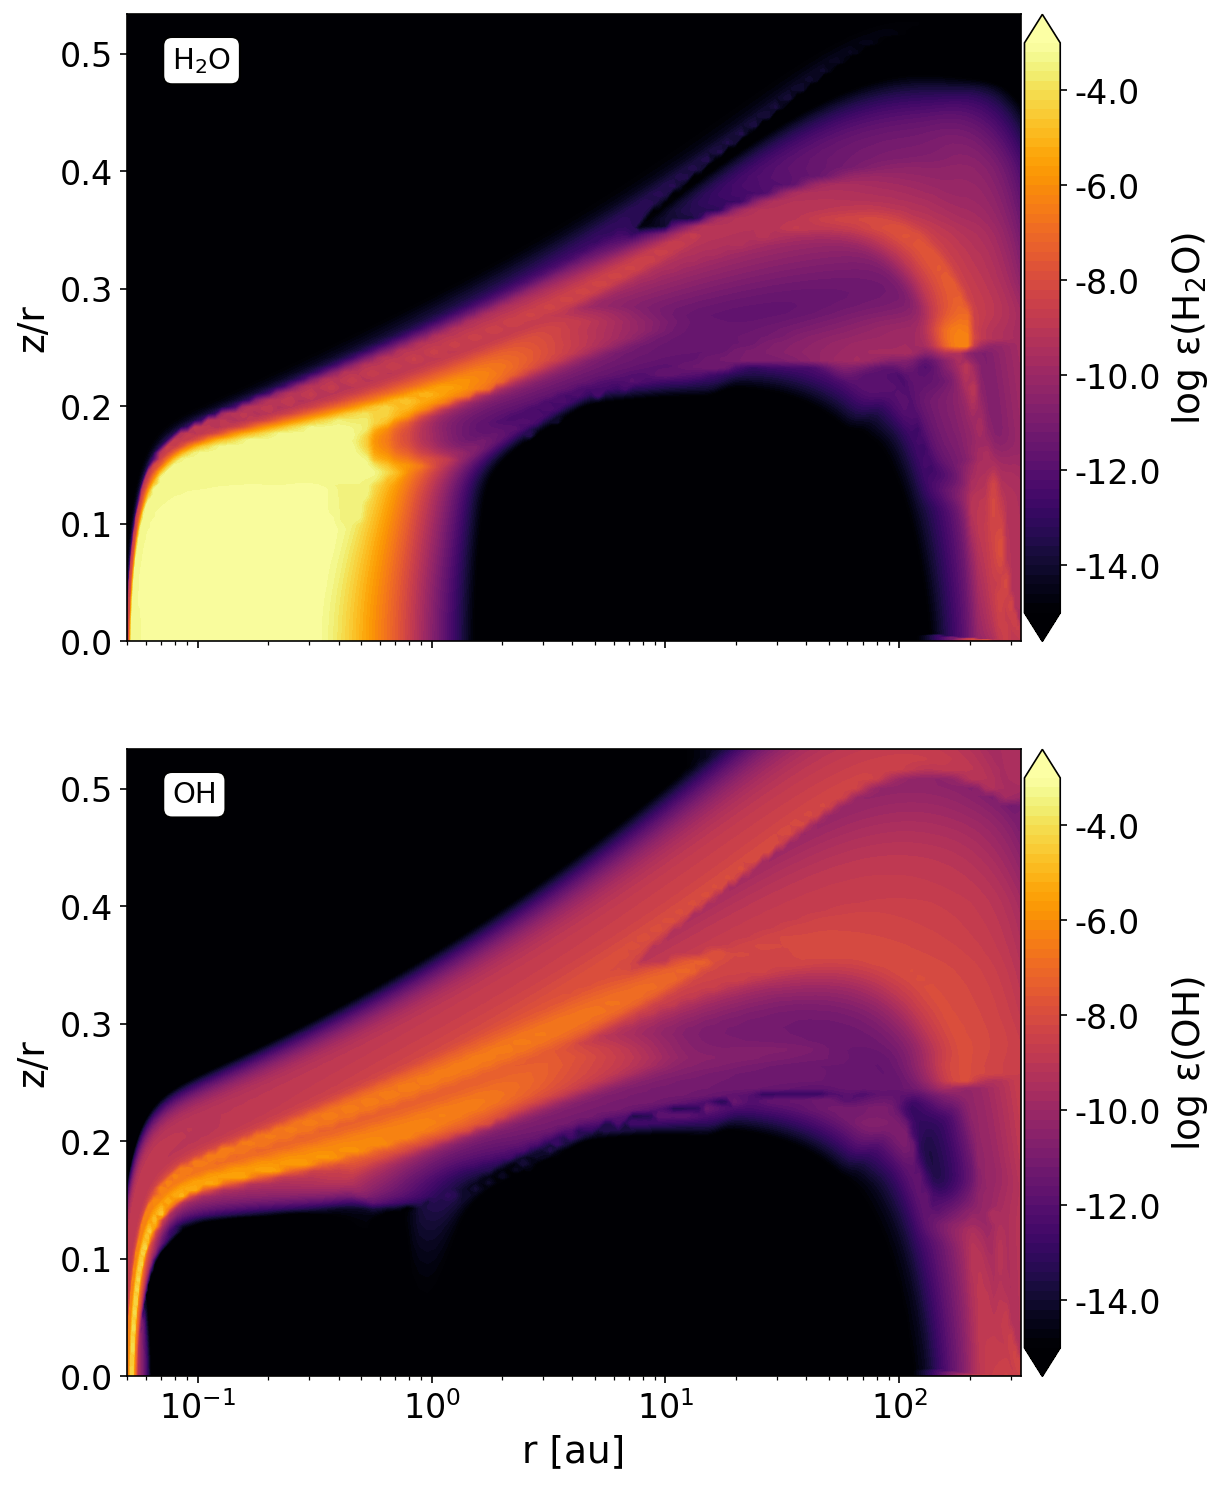

In [38]:
species = ["H2O","OH"]

pp=pplot.Plot(None)
props = dict(boxstyle='round', facecolor='white', alpha=1)
tcont=pplot.Contour(model.tg, [20,100,1000], linestyles=["-","--",":"],
                  showlabels=True,label_fontsize=14,label_fmt="%.0f")
#tcont.label_locations=[(100,100),(55,5),(40,5)]

# another contour, a simple one
avcont=pplot.Contour(model.AV,[1.0],colors="white", linewidths=3)
# fig, axs = plt.subplots(1, 2, figsize=(9, 2.7))
cbticks=[10,30,100,300,1000]
fig =pp.plot_abuncont_grid(model,
                      species,nrows=2, ncols=1,
                      zlim=[1.e-15,1.e-3],extend="both",contour=False, cmap='inferno', showcb=True)
fig.set_size_inches(8, 10)
species = [r"H$_2\mathrm{O}$",r"OH"]
axs = fig.get_axes()
axs[0].text(0.05, 0.95, species[0], transform=axs[0].transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
axs[1].text(0.05, 0.95, species[1], transform=axs[1].transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
axs[0].set_xlabel('')
axs[0].set_xticklabels([])
plt.savefig('Figures/Densities.jpg', bbox_inches='tight')
plt.show()

In [99]:
with open('FLiTsData1000_N.pkl', 'rb') as f:
    df = pickle.load(f)

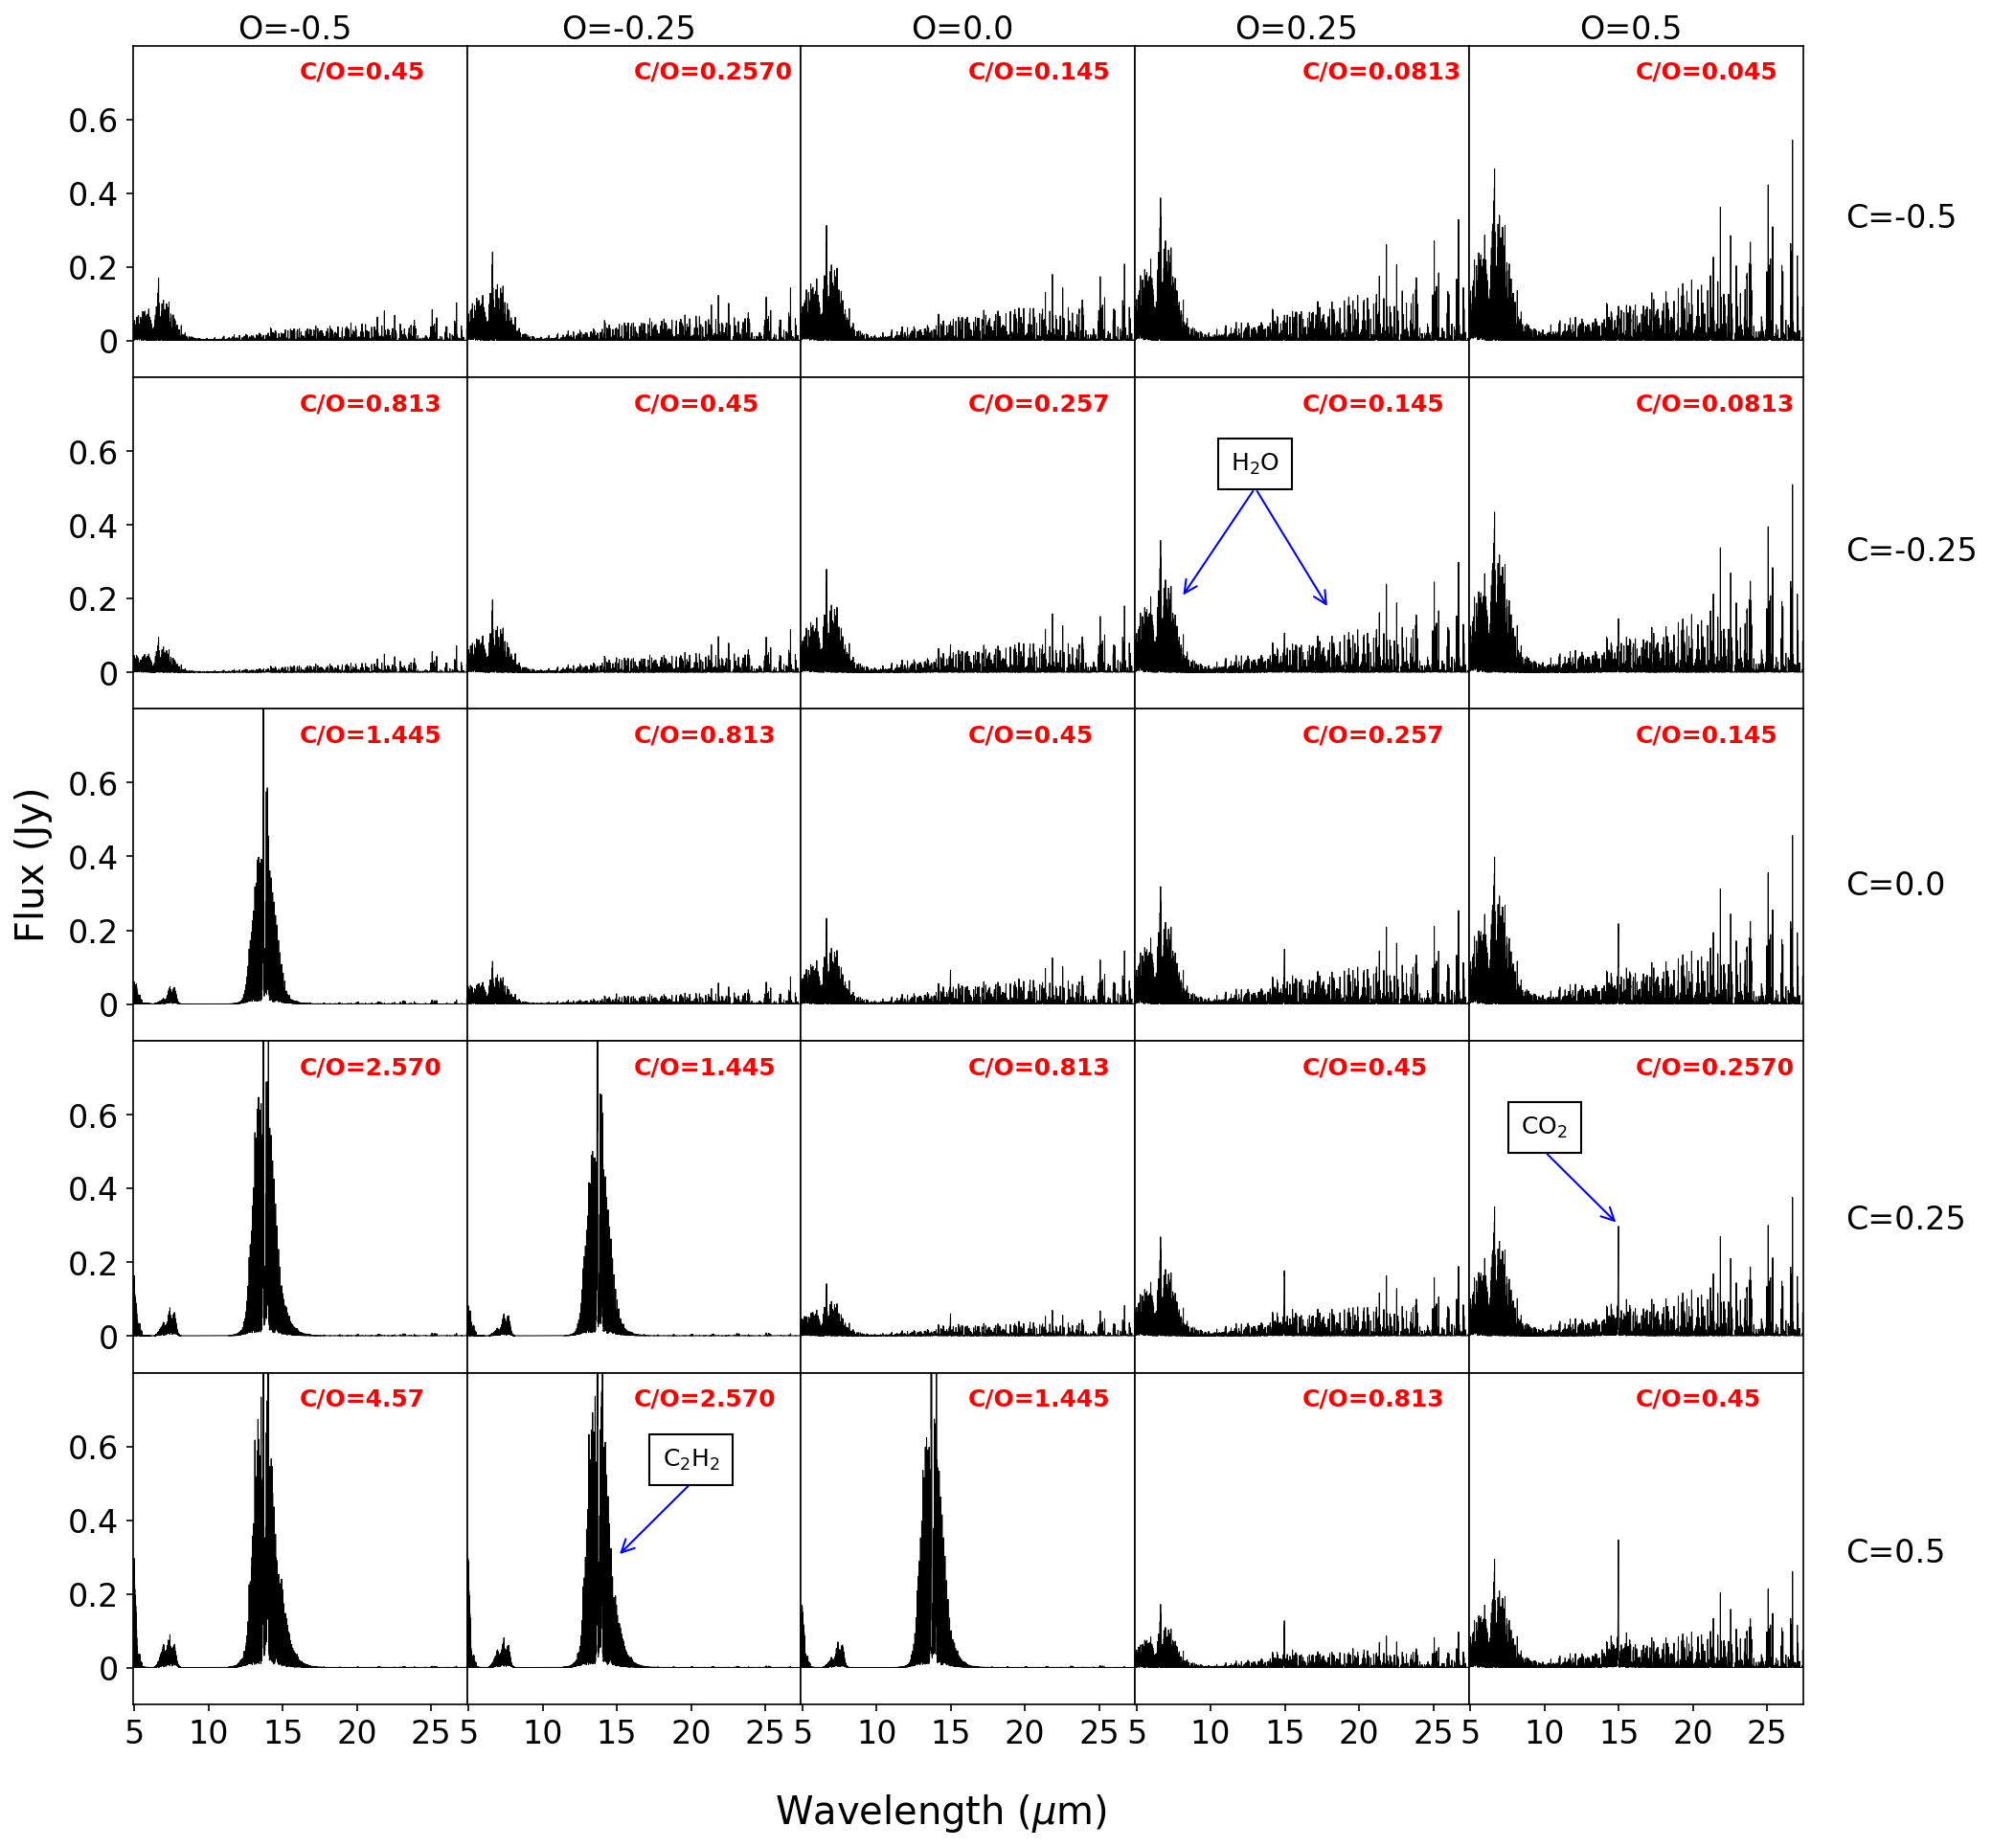

In [100]:
from matplotlib.offsetbox import AnnotationBbox, TextArea
plt.close('all')
total_spec = None
cmap = mpl.colormaps.get_cmap('tab20')
# fig, ax = plt.subplots(figsize=(14, 5))
species = ['C2H2','CH4', 'CO', 'CO2', 'H2O', 'HCN',  'NO', 'O2', 'OH','NH3']
# species = ['atomic', 'CH4',  'CO', 'CO2', 'HCN', 'NH3', 'NO', 'O2', 'OH']
species =['NH3']
fig = plt.figure(figsize=(15, 15))
gs = fig.add_gridspec(5, 5, hspace=0, wspace=0)
axes = gs.subplots(sharex='col', sharey='row').flatten()
xrange=[4.9, 27.4]
yrange=[-0.1,0.8]
num_xticks = 6
num_yticks = 5
xticks = [5, 10, 15, 20, 25, 30]
yticks = [0, 0.2, 0.4, 0.6, 0.8]
for i in range(25):
    n_row, n_col = divmod(i, 5)
    total_spec = None
    # fig, ax = plt.subplots(figsize=(14, 5))
    model = df['Model Name'][i]
    FLiTs_wl = df.loc[df['Model Name'] == model, 'FLiTs Wavelength'].values[0].copy()
    FLiTs_flux = df.loc[df['Model Name'] == model, 'FLiTs Flux'].values[0].copy()
    # for index, specie in enumerate(species):
    #     specie_wl = df.loc[df['Model Name'] == model, f'FLiTs {specie} Wavelength'].values[0].copy()
    #     specie_flux = df.loc[df['Model Name'] == model, f'FLiTs {specie} Flux'].values[0].copy()
    #     new_specie_flux = np.interp(FLiTs_wl, specie_wl, specie_flux, left=0, right=0)
    #     if total_spec is None:
    #         total_spec = new_specie_flux
    #     else:
    #         total_spec += new_specie_flux
    #     axes[i].fill_between(FLiTs_wl, 0, total_spec*1000, label=specie, zorder=len(species) - index+1,
    #                     color=cmap(index / len(species)))
        # ax.fill_between(specie_wl,0, specie_flux*1000, label=specie, zorder=len(species) - index+1,
        #                 color=cmap(index / len(species)))
        # new_flux = np.interp(FLiTs_wl, specie_wl, specie_flux)
        # ax.plot(FLiTs_wl, np.log10(new_flux/FLiTs_flux+1))
        # axes[i].plot(FLiTs_wl, new_specie_flux*1000)
    axes[i].plot(FLiTs_wl, FLiTs_flux, c='black', lw=.5, label='FLiTs', zorder=20, rasterized=True)
    # ax.plot(specie_wl, specie_flux)
    # ax.plot(total_FLiTs_wl, interp_flux*1000, color='grey', zorder=30)
    # fig.suptitle(model)
    axes[i].text(xrange[0] + (xrange[1] - xrange[0]) * 0.5, yrange[0] + (yrange[1] - yrange[0]) * 0.9,f'C/O={df.loc[df['Model Name'] == model, 'CO Value'].values[0]}', fontsize=12, color='red',weight='bold')
    axes[i].set_xlim(xrange)
    axes[i].set_ylim(yrange)
    if n_col == 0:
        # axes[i].set_ylabel("Flux (Jy)", fontsize=14)
        axes[i].set_yticks(yticks[:-1])
        axes[i].set_yticklabels(yticks[:-1])
    else:
        axes[i].tick_params(labelleft=False, left=False)
    if n_row == 4:
        # axes[i].set_xlabel(r"Wavelength ($\mu$m)", fontsize=14)
        axes[i].set_xticks(xticks[:-1])
        axes[i].set_xticklabels(xticks[:-1])
    else:
        axes[i].tick_params(labelbottom=False, bottom=False)

    if i==8:
        text_x, text_y = 13, 0.5
        text_pos = (13, 0.5)
        text_box = TextArea(r"H$_2$O", textprops=dict(fontsize=12))

        ab = AnnotationBbox(
            text_box,
            text_pos,
            box_alignment=(0.5, -0.45)  # center alignment
        )
        axes[i].add_artist(ab)
        # Place the actual text
        # axes[i].text(text_x, text_y, 'H2O', fontsize=12)

        # First arrow to point (2, 4)
        axes[i].annotate('', xy=(8, 0.2), xytext=text_pos,
                    arrowprops=dict(arrowstyle='->', color='blue'))

        # Second arrow to point (3, 9)
        axes[i].annotate('', xy=(18, 0.17), xytext=text_pos,
                    arrowprops=dict(arrowstyle='->', color='blue'))
    if i==21:
        text_pos = (20, 0.5)
        text_box = TextArea(r"C$_2$H$_2$", textprops=dict(fontsize=12))

        ab = AnnotationBbox(
            text_box,
            text_pos,
            box_alignment=(0.5, -0.45)  # center alignment
        )
        axes[i].add_artist(ab)
        # Place the actual text
        # axes[i].text(text_x, text_y, 'H2O', fontsize=12)

        # First arrow to point (2, 4)
        axes[i].annotate('', xy=(15, 0.3), xytext=text_pos,
                    arrowprops=dict(arrowstyle='->', color='blue'))
    if i==19:
        text_pos = (10, 0.5)
        text_box = TextArea(r"CO$_2$", textprops=dict(fontsize=12))

        ab = AnnotationBbox(
            text_box,
            text_pos,
            box_alignment=(0.5, -0.45)  # center alignment
        )
        axes[i].add_artist(ab)
        # Place the actual text
        # axes[i].text(text_x, text_y, 'H2O', fontsize=12)

        # First arrow to point (2, 4)
        axes[i].annotate('', xy=(15, 0.3), xytext=text_pos,
                    arrowprops=dict(arrowstyle='->', color='blue'))
# Convert to 2D array for easier indexing
axes_grid = axes.reshape(5, 5)

# Label top (columns)
for i in range(5):
    fig.text(0.2 + i * 0.155, 0.88, f'O={.25*i-0.5}', ha='center', va='bottom')

# Add right row labels
for i in range(5):
    fig.text(0.92, 0.8 - i * 0.155, f'C={.25*i-0.5}', va='center', ha='left')
fig.supxlabel(r'Wavelength ($\mu$m)', y=0.05)
fig.supylabel('Flux (Jy)', x=0.07)
plt.savefig('Figures/All_spectra.jpg', dpi=600, bbox_inches='tight')
plt.show()

In [102]:
data = []
species = ['atomic', 'C2H2', 'CH4', 'CO', 'CO2', 'H2O', 'HCN', 'NH3', 'NO', 'O2', 'OH']
for i, row in df.iterrows():
    fluxes = []
    for specie in species:
        fluxes.append(total_flux(row[f'FLiTs {specie} Wavelength'], row[f'FLiTs {specie} Flux']))
    # print(min(row[f'FLiTs {specie} Wavelength']), max(row[f'FLiTs {specie} Wavelength']))
    data.append(fluxes)
df_FLiTs_flux = pd.DataFrame(data, columns=species)

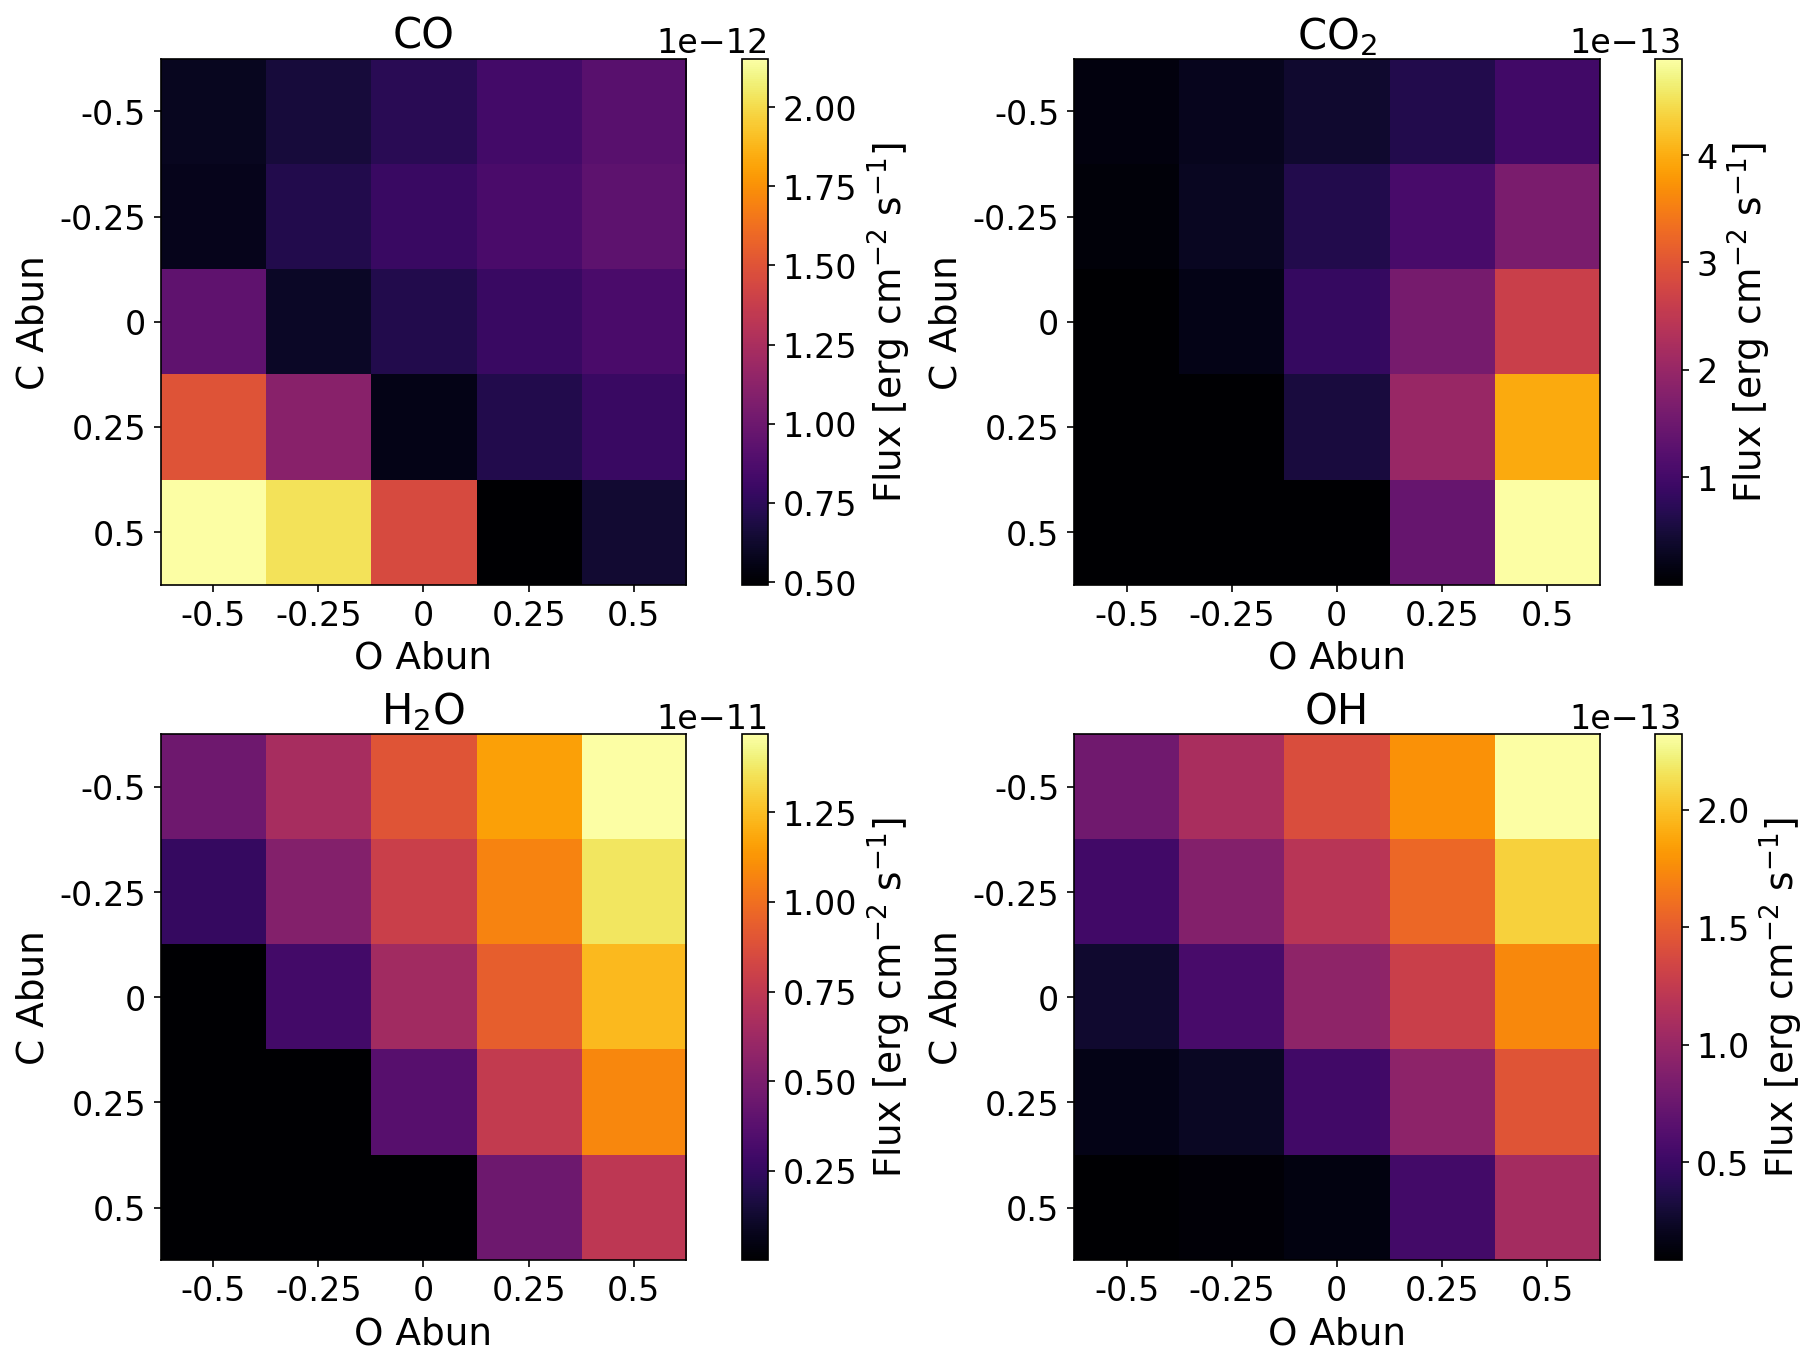

In [105]:
fig, axes = plt.subplots(2, 2, figsize=(12, 9), constrained_layout=True)
axes = axes.flatten()
specie_title = {'CO':'CO', 'CO2':r'CO$_2$', 'H2O':r'H$_2$O', 'OH':'OH'}
for i, specie in enumerate(['CO', 'CO2', 'H2O', 'OH']):
    im = axes[i].imshow(df_FLiTs_flux[specie].values.reshape(5,5), cmap='inferno')
    axes[i].set_title(specie_title[specie], pad=5)
    axes[i].set_xticks(np.arange(5))
    axes[i].set_xticklabels([-0.5, -0.25, 0, 0.25, 0.5])
    axes[i].set_yticks(np.arange(5))
    axes[i].set_yticklabels([-0.5, -0.25, 0, 0.25, 0.5])
    axes[i].set_xlabel('O Abun')
    axes[i].set_ylabel('C Abun')

    # Use fig.colorbar without inset_axes
    fig.colorbar(im, ax=axes[i], orientation='vertical', fraction=0.06, pad=-0.05, label='Flux [erg cm$^{-2}$ s$^{-1}$]')

fig.savefig('Figures/Heatmaps1.jpg')
plt.show()

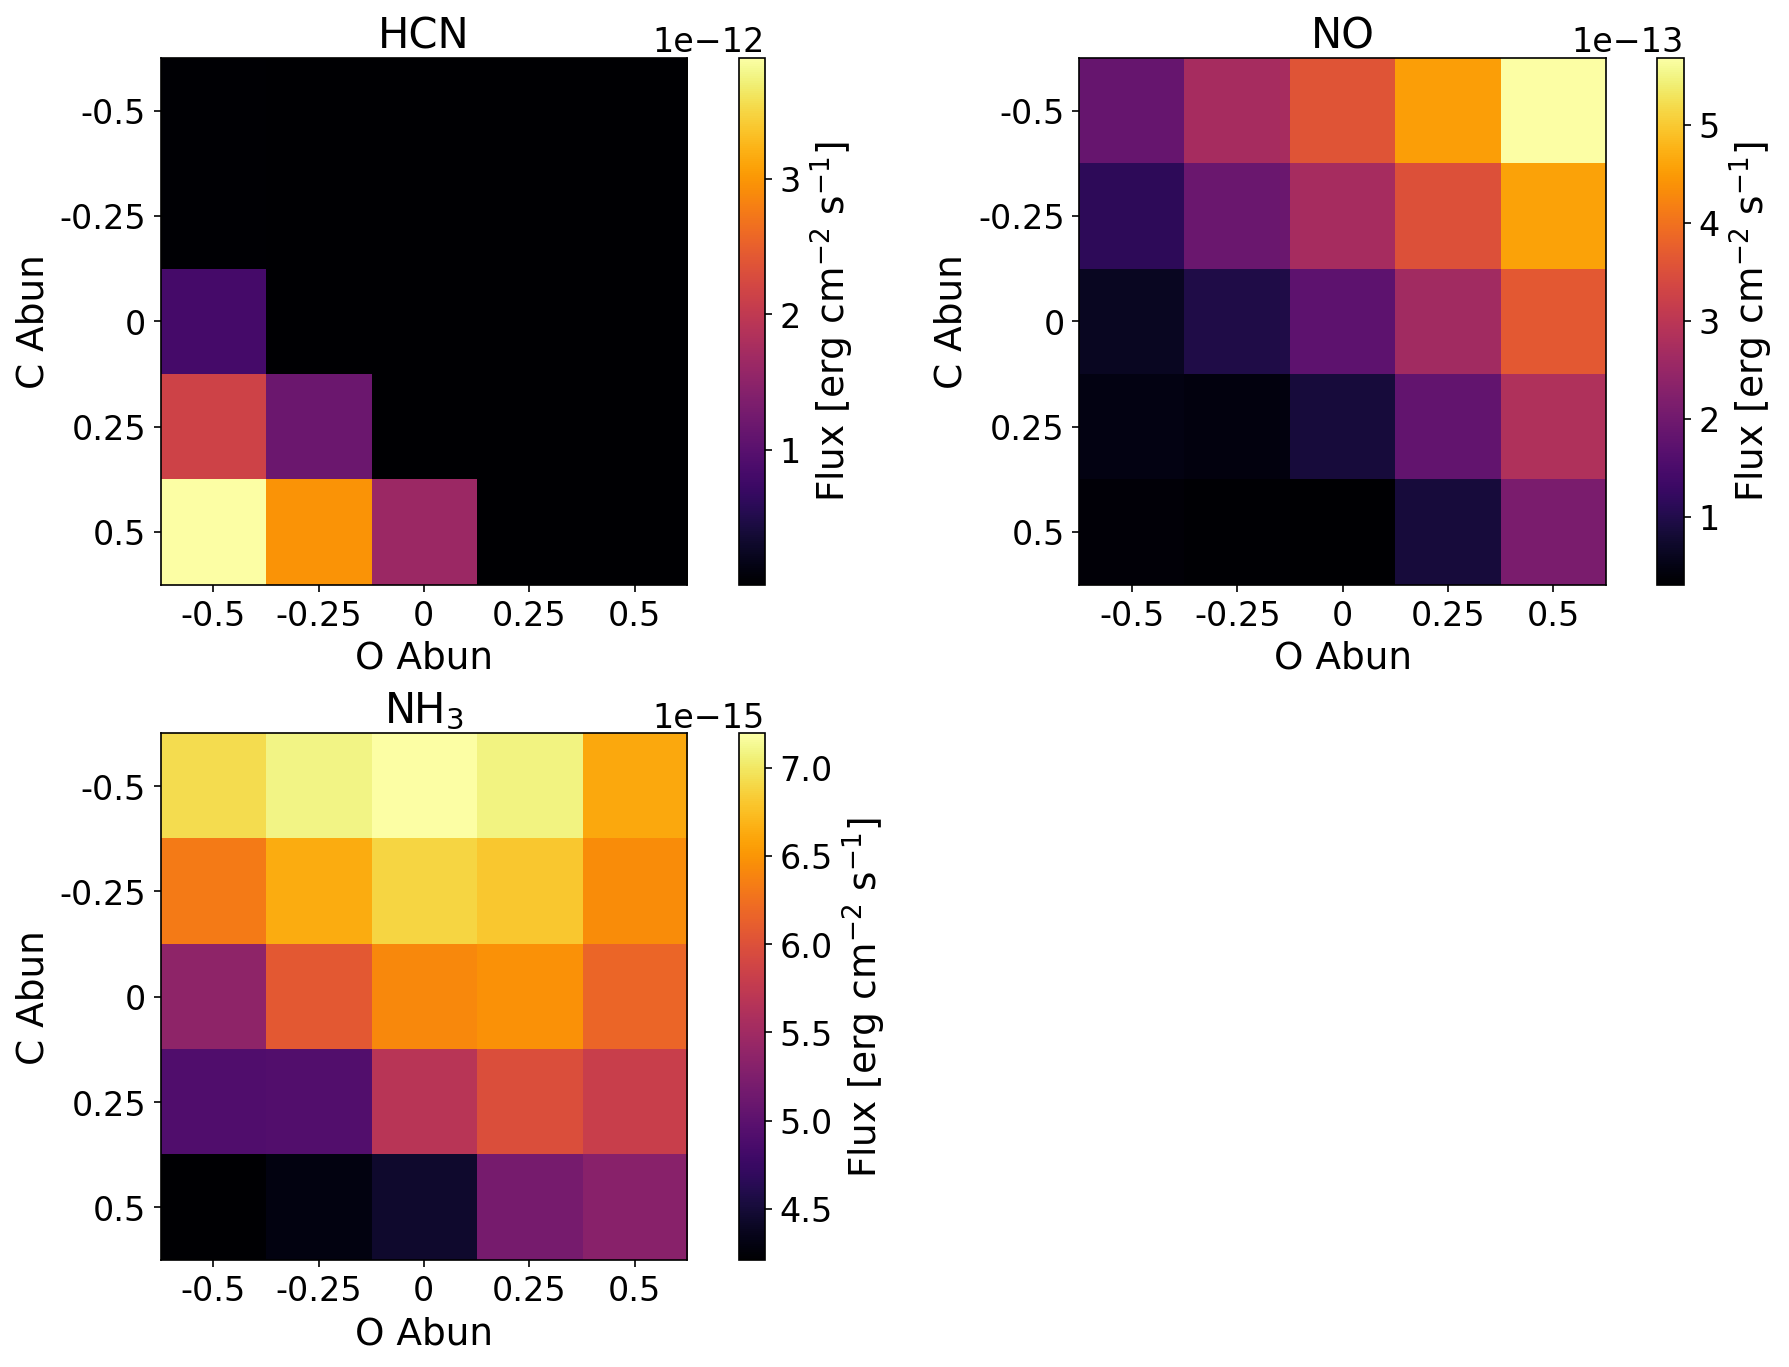

In [108]:
fig, axes = plt.subplots(2, 2, figsize=(12, 9), constrained_layout=True)
axes = axes.flatten()
specie_title = {'C2H2':r'C$_2$H$_2$', 'HCN':'HCN', 'NO':'NO', 'NH3':'NH$_3$'}
for i, specie in enumerate(['HCN', 'NO', 'NH3', 'C2H2']):
    if i == 3:
        break
    im = axes[i].imshow(df_FLiTs_flux[specie].values.reshape(5,5), cmap='inferno')
    axes[i].set_title(specie_title[specie], pad=5)
    axes[i].set_xticks(np.arange(5))
    axes[i].set_xticklabels([-0.5, -0.25, 0, 0.25, 0.5])
    axes[i].set_yticks(np.arange(5))
    axes[i].set_yticklabels([-0.5, -0.25, 0, 0.25, 0.5])
    axes[i].set_xlabel('O Abun')
    axes[i].set_ylabel('C Abun')

    # Use fig.colorbar without inset_axes
    fig.colorbar(im, ax=axes[i], orientation='vertical', fraction=0.04, pad=-0.05, label='Flux [erg cm$^{-2}$ s$^{-1}$]')
axes[3].remove()
fig.savefig('Figures/Heatmaps2.jpg')
plt.show()

In [110]:
colors = {'atomic': 'tomato', 'C2H2': 'yellow', 'CH4': 'mediumorchid', 'CO': 'red', 'CO2': 'limegreen', 'H2O': 'dodgerblue',
          'HCN': 'orange', 'NH3': 'cyan', 'NO': 'gold', 'OH': 'magenta'}

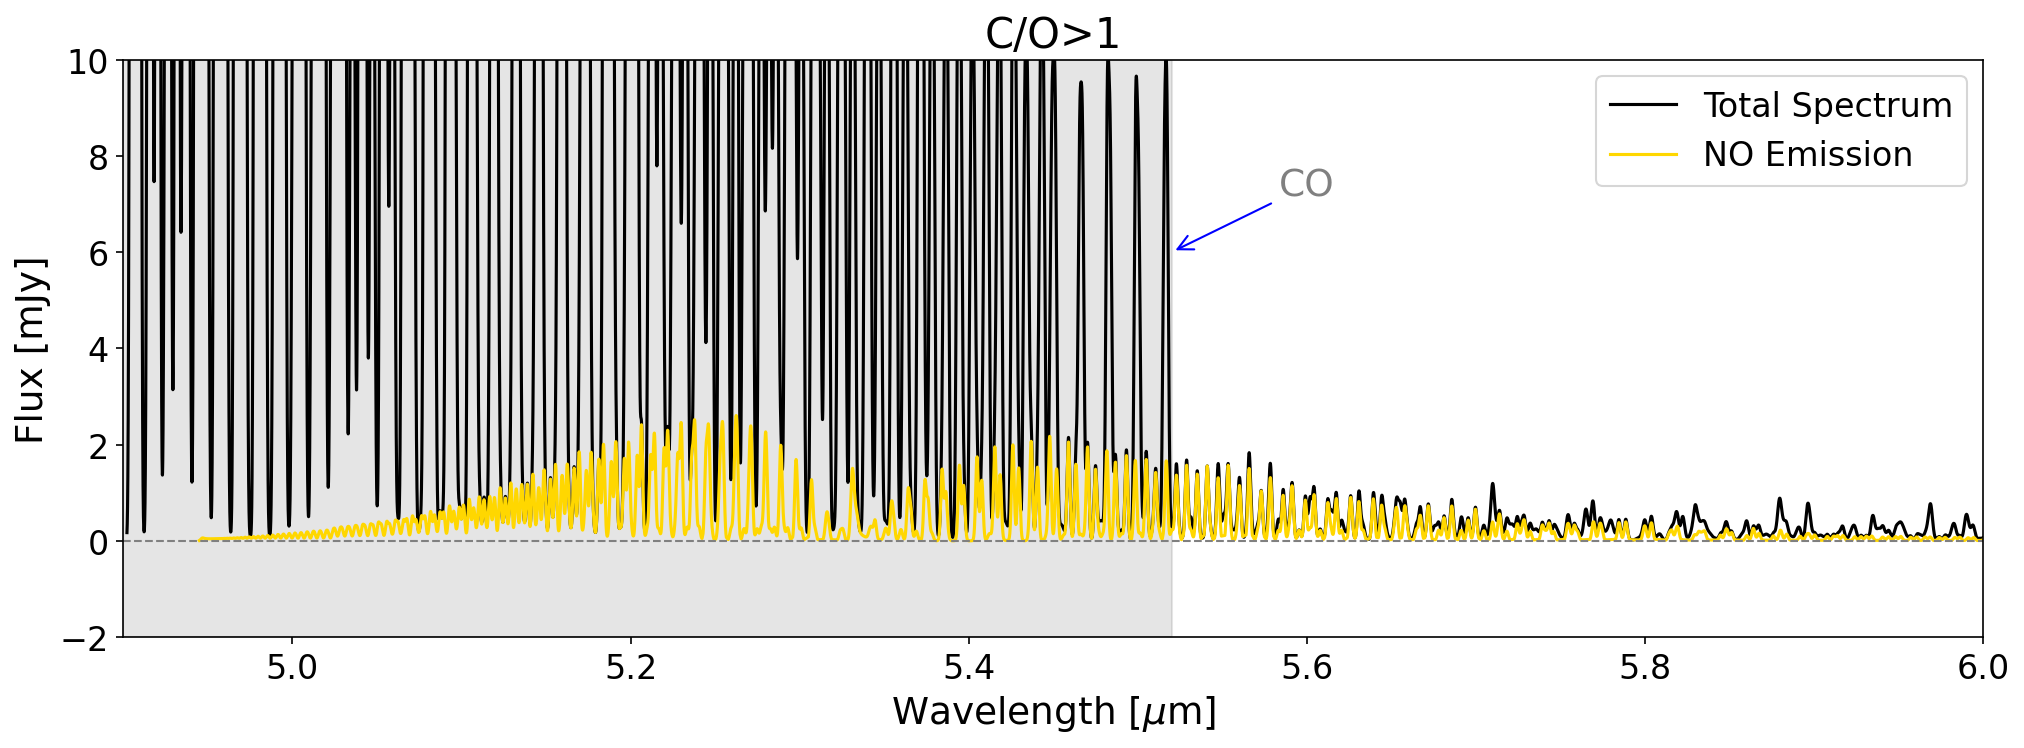

In [112]:
species = ['NO']
clip_min, clip_max = 4.9, 6
plt.figure(figsize=(16, 5))
for target in species:
    for i, row in df.iterrows():
        if i != 16:
            continue
        # plt.figure(figsize=(16, 5))

        wavelength = row['FLiTs Wavelength'].copy()
        flux_cont_sub = row['FLiTs Flux'].copy()
        continuum = row['FLiTs Flux Continuum'].copy()

        NH3_wl = row['FLiTs NH3 Wavelength'].copy()
        NH3_flux = row['FLiTs NH3 Flux'].copy()
        NH3_flux = np.interp(wavelength, NH3_wl, NH3_flux)

        flux_cont_sub += NH3_flux
        flux_cont_sub = add_noise(flux_cont_sub + continuum, SNR=np.inf) - continuum

        real_wl = row[f'FLiTs {target} Wavelength']
        real_flux = row[f'FLiTs {target} Flux']

        plt.plot(wavelength, flux_cont_sub*1000, c='black', label='Total Spectrum')
        plt.plot(real_wl, real_flux*1000, c=colors[target], label=f'{target} Emission')

        plt.title(f'C/O>1')
        plt.axhline(0, color='grey', linestyle='--', linewidth=1)
        plt.xlim(clip_min, clip_max)
        plt.ylim(-2, 10)
        plt.xlabel(r'Wavelength [$\mu$m]')
        plt.ylabel('Flux [mJy]')
        plt.legend(loc='upper right')
        plt.axvspan(4.9, 5.52, color='grey', alpha=0.2)
        plt.annotate('CO', xy=(5.52, 6), xytext=(5.6, 7), ha='center', va='bottom', fontsize=18, color='grey', arrowprops=dict(arrowstyle='->', color='blue'))
        plt.savefig('Figures/NO_region.jpg', bbox_inches='tight')

plt.show()

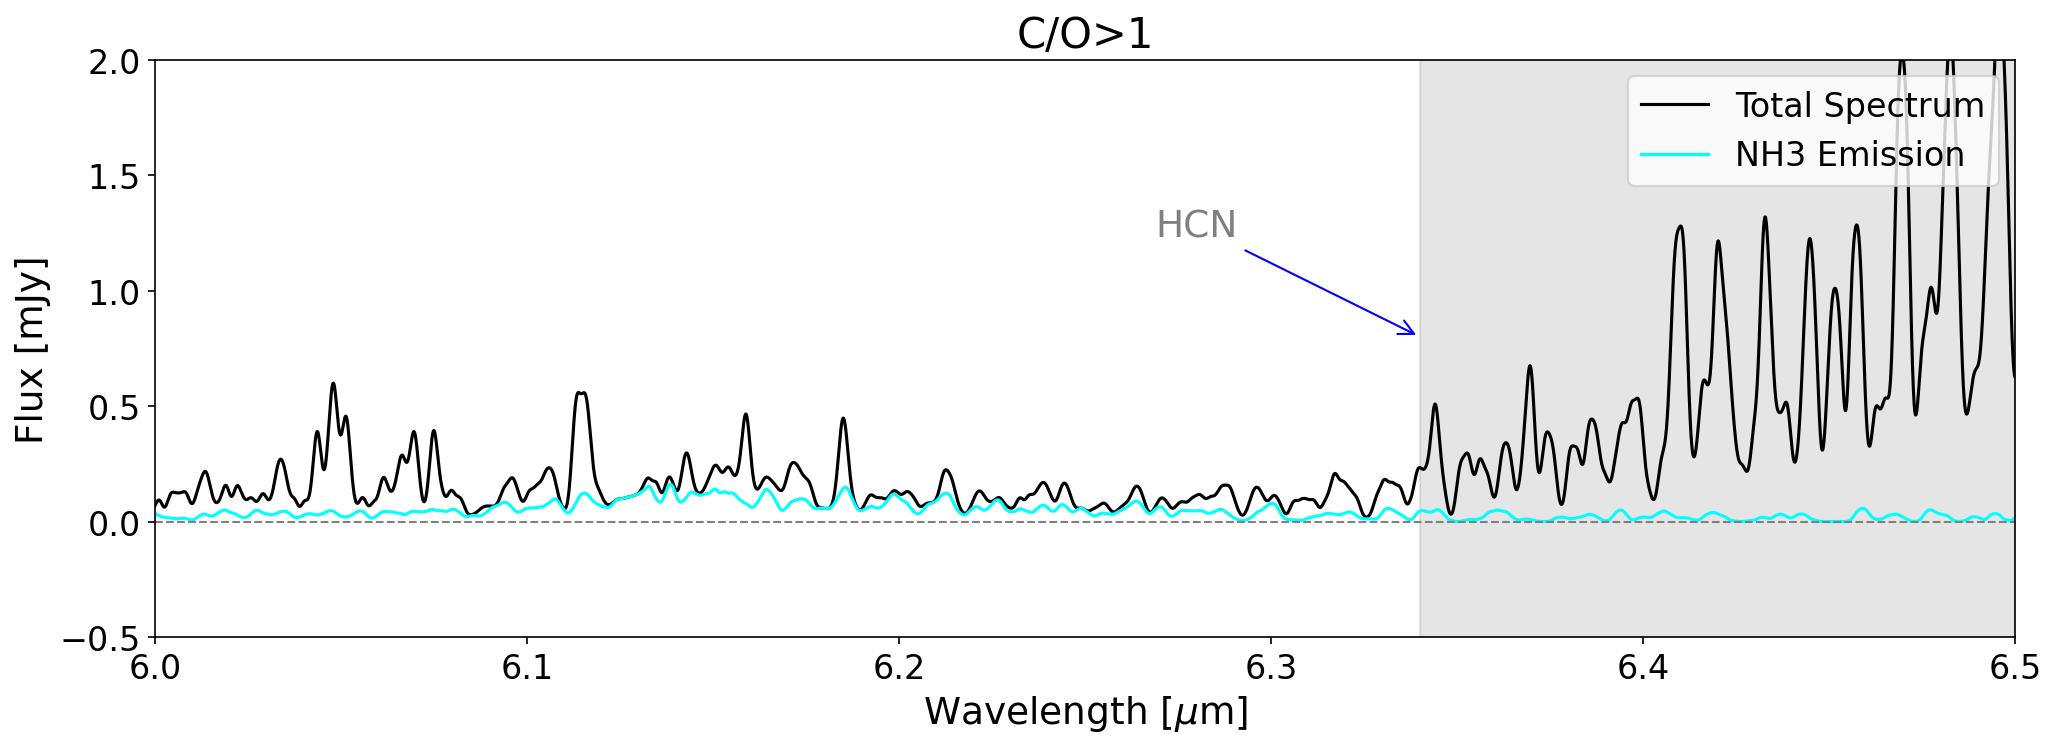

In [113]:
species = ['NH3']
clip_min, clip_max = 6, 6.5
plt.figure(figsize=(16, 5))
for target in species:
    for i, row in df.iterrows():
        if i != 16:
            continue
        # plt.figure(figsize=(16, 5))

        wavelength = row['FLiTs Wavelength'].copy()
        flux_cont_sub = row['FLiTs Flux'].copy()
        continuum = row['FLiTs Flux Continuum'].copy()

        NH3_wl = row['FLiTs NH3 Wavelength'].copy()
        NH3_flux = row['FLiTs NH3 Flux'].copy()
        NH3_flux = np.interp(wavelength, NH3_wl, NH3_flux)

        flux_cont_sub += NH3_flux
        flux_cont_sub = add_noise(flux_cont_sub + continuum, SNR=np.inf) - continuum

        real_wl = row[f'FLiTs {target} Wavelength']
        real_flux = row[f'FLiTs {target} Flux']

        plt.plot(wavelength, flux_cont_sub*1000, c='black', label='Total Spectrum')
        plt.plot(real_wl, real_flux*1000, c=colors[target], label=f'{target} Emission')

        plt.title(f'C/O>1')
        plt.axhline(0, color='grey', linestyle='--', linewidth=1)
        plt.xlim(clip_min, clip_max)
        plt.ylim(-0.5, 2)
        plt.xlabel(r'Wavelength [$\mu$m]')
        plt.ylabel('Flux [mJy]')
        plt.legend(loc='upper right')
        plt.axvspan(6.34, 6.5, color='grey', alpha=0.2)
        plt.annotate('HCN', xy=(6.34, 0.8), xytext=(6.28, 1.2), ha='center', va='bottom', fontsize=18, color='grey', arrowprops=dict(arrowstyle='->', color='blue'))
        plt.savefig('Figures/NH3_region1.jpg', bbox_inches='tight')
plt.show()

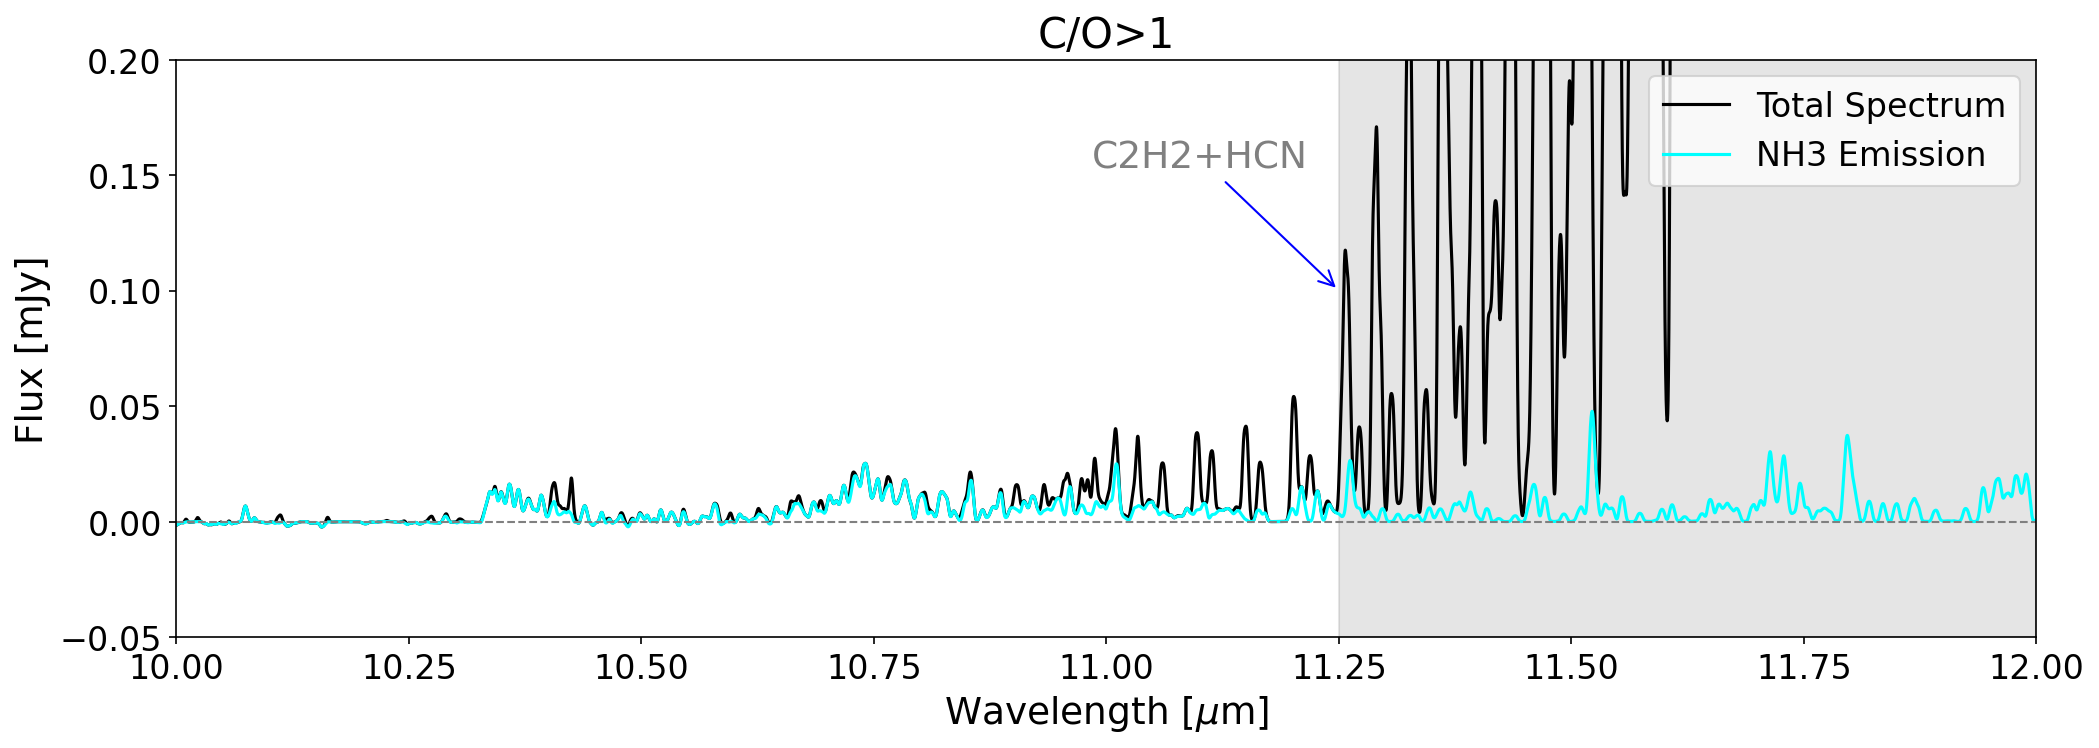

In [114]:
species = ['NH3']
clip_min, clip_max = 10, 12
plt.figure(figsize=(16, 5))
for target in species:
    for i, row in df.iterrows():
        if i != 16:
            continue
        # plt.figure(figsize=(16, 5))

        wavelength = row['FLiTs Wavelength'].copy()
        flux_cont_sub = row['FLiTs Flux'].copy()
        continuum = row['FLiTs Flux Continuum'].copy()

        NH3_wl = row['FLiTs NH3 Wavelength'].copy()
        NH3_flux = row['FLiTs NH3 Flux'].copy()
        NH3_flux = np.interp(wavelength, NH3_wl, NH3_flux)

        flux_cont_sub += NH3_flux
        flux_cont_sub = add_noise(flux_cont_sub + continuum, SNR=np.inf) - continuum

        real_wl = row[f'FLiTs {target} Wavelength']
        real_flux = row[f'FLiTs {target} Flux']

        plt.plot(wavelength, flux_cont_sub*1000, c='black', label='Total Spectrum')
        plt.plot(real_wl, real_flux*1000, c=colors[target], label=f'{target} Emission')

        plt.title(f'C/O>1')
        plt.axhline(0, color='grey', linestyle='--', linewidth=1)
        plt.xlim(clip_min, clip_max)
        plt.ylim(-0.05, .2)
        plt.xlabel(r'Wavelength [$\mu$m]')
        plt.ylabel('Flux [mJy]')
        plt.legend(loc='upper right')
        plt.axvspan(11.25, 12, color='grey', alpha=0.2)
        # plt.text(11.15, 0.15, 'C2H2+HCN', ha='center', va='bottom', fontsize=15, color='grey')
        plt.annotate('C2H2+HCN', xy=(11.25, 0.1), xytext=(11.1, 0.15), ha='center', va='bottom', fontsize=18, color='grey', arrowprops=dict(arrowstyle='->', color='blue'))
        plt.savefig('Figures/NH3_region2.jpg', bbox_inches='tight')
plt.show()

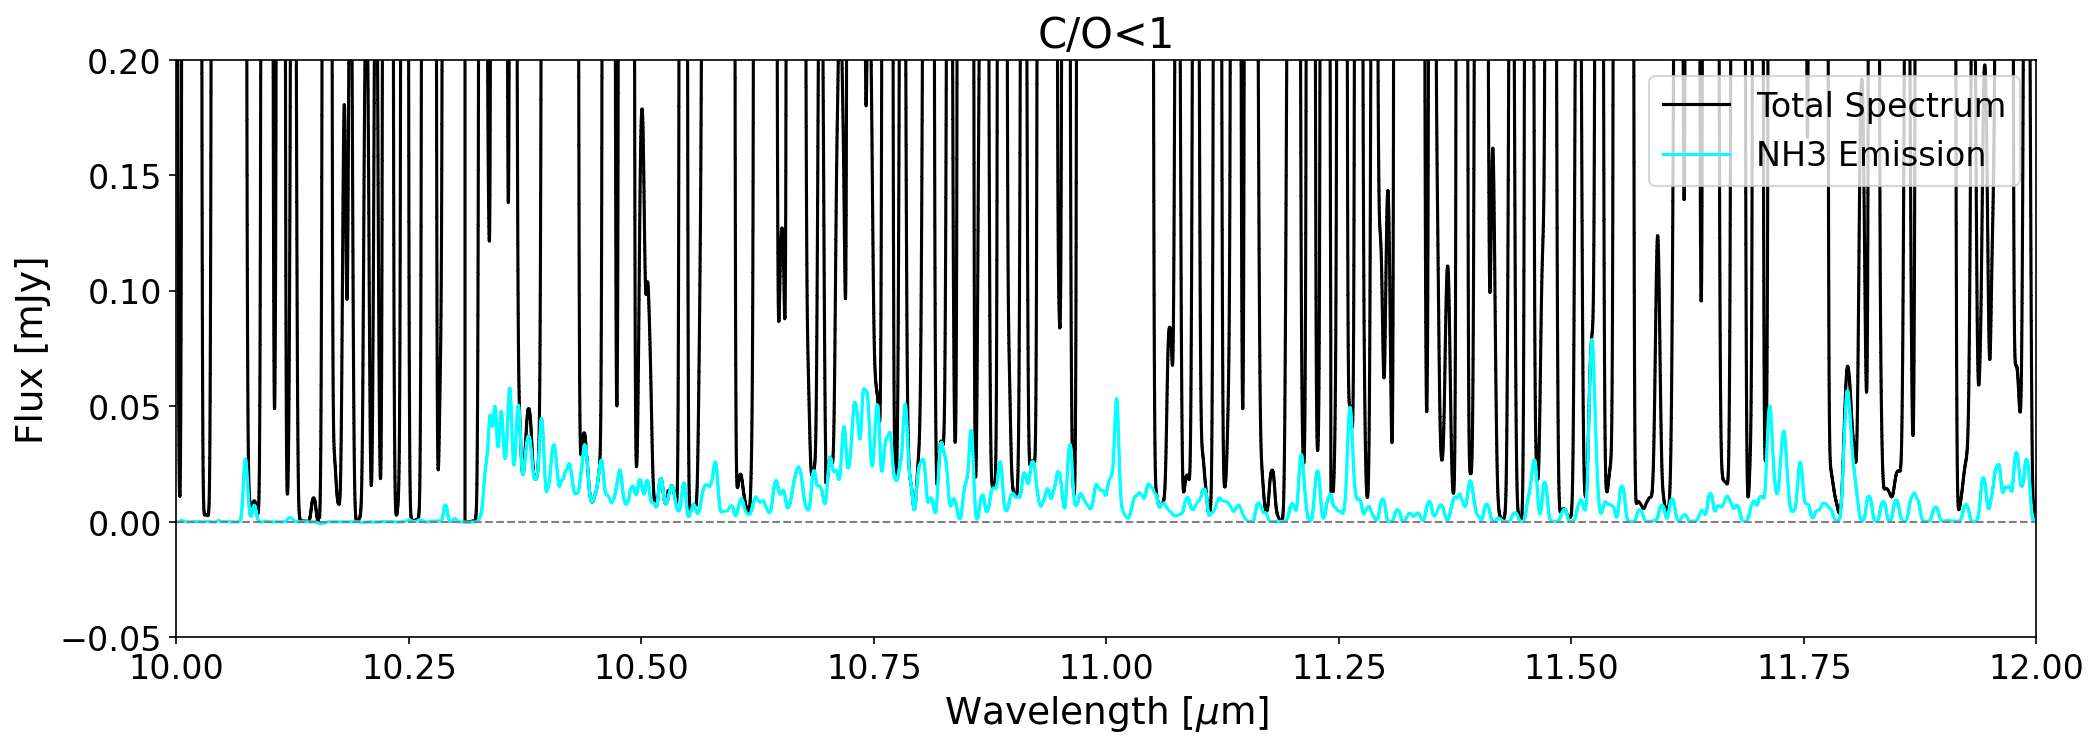

In [115]:
species = ['NH3']
clip_min, clip_max = 10, 12
plt.figure(figsize=(16, 5))
for target in species:
    for i, row in df.iterrows():
        if i != 12:
            continue
        # plt.figure(figsize=(16, 5))

        wavelength = row['FLiTs Wavelength'].copy()
        flux_cont_sub = row['FLiTs Flux'].copy()
        continuum = row['FLiTs Flux Continuum'].copy()

        NH3_wl = row['FLiTs NH3 Wavelength'].copy()
        NH3_flux = row['FLiTs NH3 Flux'].copy()
        NH3_flux = np.interp(wavelength, NH3_wl, NH3_flux)

        flux_cont_sub += NH3_flux
        flux_cont_sub = add_noise(flux_cont_sub + continuum, SNR=np.inf) - continuum

        real_wl = row[f'FLiTs {target} Wavelength']
        real_flux = row[f'FLiTs {target} Flux']

        plt.step(wavelength, flux_cont_sub*1000, c='black', label='Total Spectrum')
        plt.step(real_wl, real_flux*1000, c=colors[target], label=f'{target} Emission')

        plt.title(f'C/O<1')
        plt.axhline(0, color='grey', linestyle='--', linewidth=1)
        plt.xlim(clip_min, clip_max)
        plt.ylim(-0.05, .2)
        plt.xlabel(r'Wavelength [$\mu$m]')
        plt.ylabel('Flux [mJy]')
        plt.legend(loc='upper right')
        plt.savefig('Figures/NH3_region3.jpg', bbox_inches='tight')
plt.show()

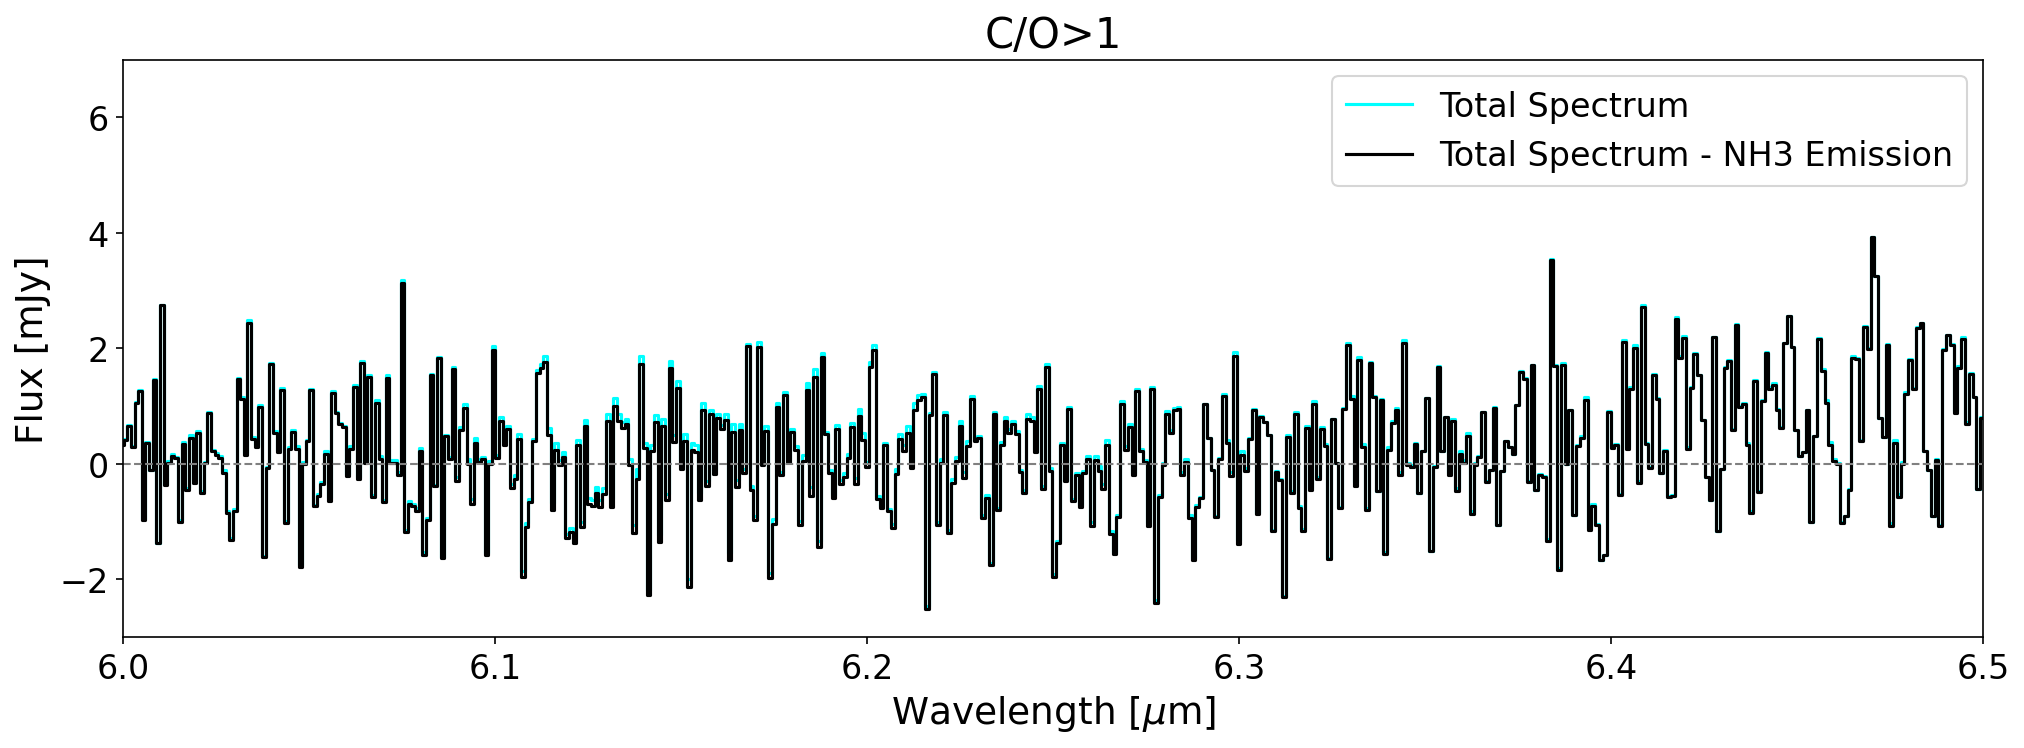

In [145]:
species = ['NH3']
clip_min, clip_max = 6, 6.5
fig, ax = plt.subplots(figsize=(16, 5))
for target in species:
    for i, row in df.iterrows():
        if i != 16:
            continue
        # plt.figure(figsize=(16, 5))

        wavelength = row['FLiTs Wavelength'].copy()
        flux_cont_sub = row['FLiTs Flux'].copy()
        continuum = row['FLiTs Flux Continuum'].copy()

        NH3_wl = row['FLiTs NH3 Wavelength'].copy()
        NH3_flux = row['FLiTs NH3 Flux'].copy()
        NH3_flux = np.interp(wavelength, NH3_wl, NH3_flux)

        flux_cont_sub += NH3_flux
        np.random.seed(42)
        flux_cont_sub = add_noise(flux_cont_sub + continuum, SNR=300) - continuum

        real_wl = row[f'FLiTs {target} Wavelength']
        real_flux = row[f'FLiTs {target} Flux']
        real_flux = np.interp(wavelength, real_wl, real_flux)

        ax.step(wavelength[::50], flux_cont_sub[::50]*1000, c=colors[target], label='Total Spectrum')
        ax.step(wavelength[::50], (flux_cont_sub - real_flux)[::50]*1000, c='black', label=f'Total Spectrum - {target} Emission')

        # Title and labels
        ax.set_title('C/O>1')
        ax.axhline(0, color='grey', linestyle='--', linewidth=1)
        ax.set_xlim(clip_min, clip_max)
        ax.set_ylim(-3, 7)
        ax.set_xlabel(r'Wavelength [$\mu$m]')
        ax.set_ylabel('Flux [mJy]')
        ax.legend(loc='upper right')

        # Save figure
        fig.savefig('Figures/AddNoise0.jpg', bbox_inches='tight')
plt.show()

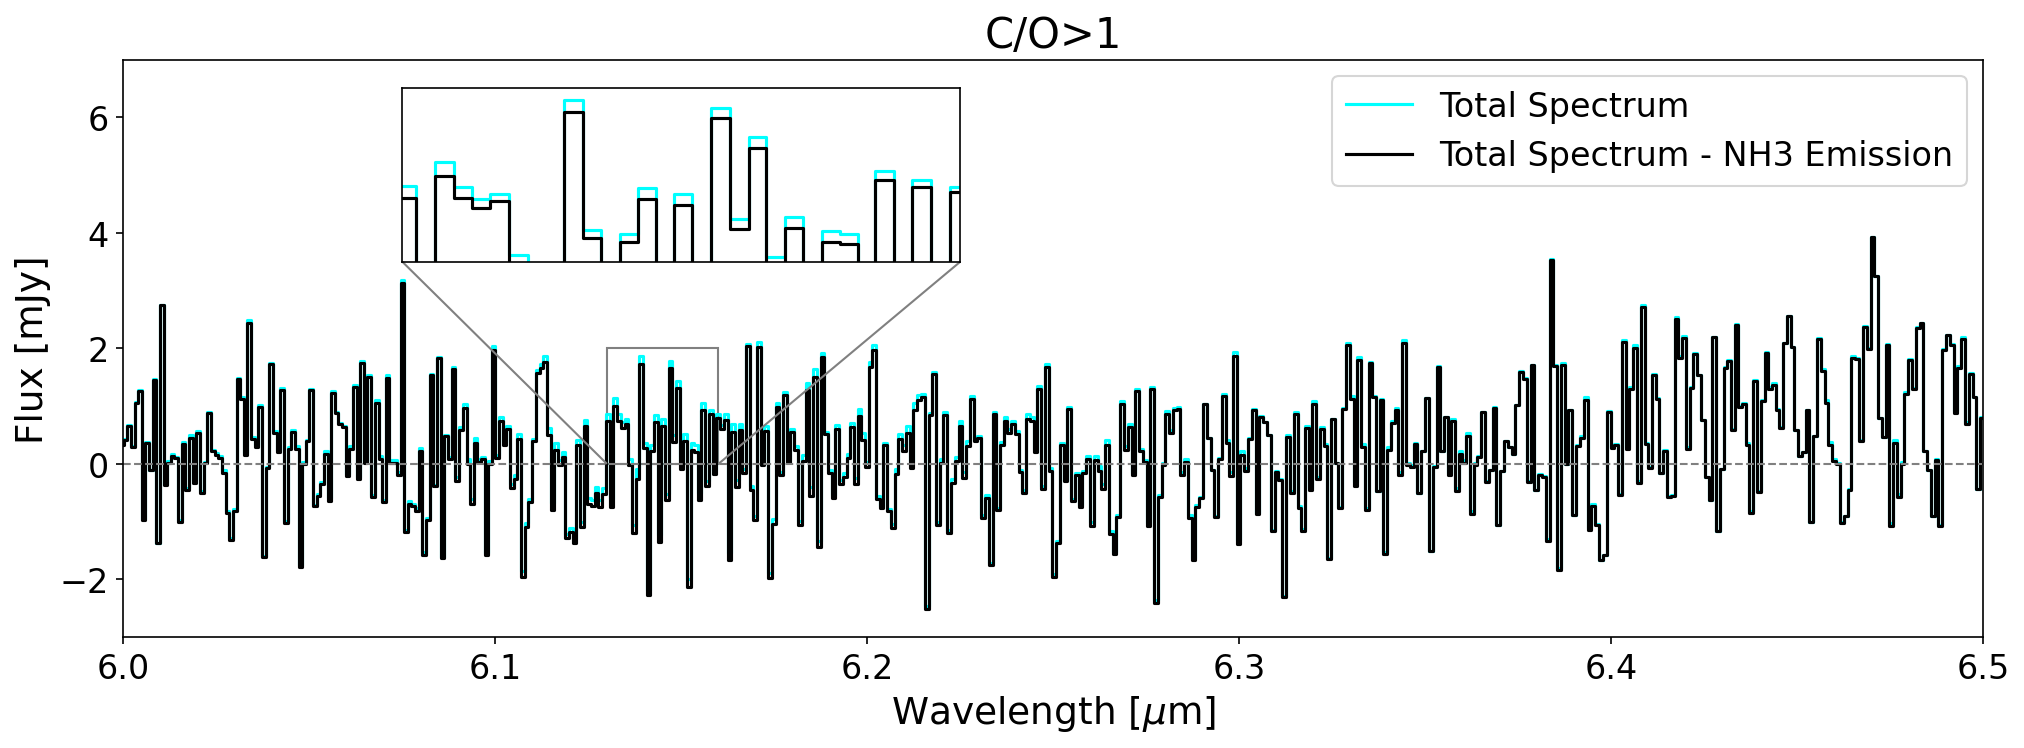

In [149]:
species = ['NH3']
clip_min, clip_max = 6, 6.5
fig, ax = plt.subplots(figsize=(16, 5))
for target in species:
    for i, row in df.iterrows():
        if i != 16:
            continue
        # plt.figure(figsize=(16, 5))

        wavelength = row['FLiTs Wavelength'].copy()
        flux_cont_sub = row['FLiTs Flux'].copy()
        continuum = row['FLiTs Flux Continuum'].copy()

        NH3_wl = row['FLiTs NH3 Wavelength'].copy()
        NH3_flux = row['FLiTs NH3 Flux'].copy()
        NH3_flux = np.interp(wavelength, NH3_wl, NH3_flux)

        flux_cont_sub += NH3_flux
        np.random.seed(42)
        flux_cont_sub = add_noise(flux_cont_sub + continuum, SNR=300) - continuum

        real_wl = row[f'FLiTs {target} Wavelength']
        real_flux = row[f'FLiTs {target} Flux']
        real_flux = np.interp(wavelength, real_wl, real_flux)

        ax.step(wavelength[::50], flux_cont_sub[::50]*1000, c=colors[target], label='Total Spectrum')
        ax.step(wavelength[::50], (flux_cont_sub - real_flux)[::50]*1000, c='black', label=f'Total Spectrum - {target} Emission')

        axins = inset_axes(ax, width="30%", height="30%", bbox_to_anchor=(-0.55, -0.05, 1, 1),  # (x, y) in axes fraction or figure fraction
            bbox_transform=ax.transAxes,
            borderpad=0,
        )
        axins.step(wavelength[::50], flux_cont_sub[::50]*1000, c=colors[target])
        axins.step(wavelength[::50], (flux_cont_sub - real_flux)[::50]*1000, c='black')
        axins.set_xlim(6.13, 6.16)
        axins.set_ylim(0, 2)
        axins.set_xticklabels([])
        axins.set_yticklabels([])
        axins.set_xticks([])
        axins.set_yticks([])
        # axins.set_title('CO2')
        mark_inset(ax, axins, loc1=4, loc2=3, fc="none", ec="0.5")

        # Title and labels
        ax.set_title('C/O>1')
        ax.axhline(0, color='grey', linestyle='--', linewidth=1)
        ax.set_xlim(clip_min, clip_max)
        ax.set_ylim(-3, 7)
        ax.set_xlabel(r'Wavelength [$\mu$m]')
        ax.set_ylabel('Flux [mJy]')
        ax.legend(loc='upper right')

        # Save figure
        fig.savefig('Figures/AddNoise1.jpg', bbox_inches='tight')
plt.show()